In [1]:
import sys
import numpy as np
from pyDOE import lhs
import torch
from torch import Tensor, ones, stack, load
from torch.autograd import grad
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
import pandas as pd
from torch.nn import Module
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from scipy import stats
from tesladatadiff3 import TeslaDatasetAll, TeslaDatasetSlice, TeslaDatasetpinn

sys.path.append("NeuralSolvers/")  
import PINNFramework as pf

Was not able to import Horovod. Thus Horovod support is not enabled


/trinity/shared/pkg/devel/python/3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Use cuda if it is available, else use the cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
def derivative(x, u):

    #print('u shape', u.shape)
    grads = ones(u.shape, device=u.device) # move to the same device as prediction
    grad_u = grad(u, x, create_graph=True, grad_outputs=grads )[0]
   
    # calculate first order derivatives
    print('grad u', grad_u)

    u_t = grad_u[:, 4]
    u_t = u_t.reshape(-1, 1)
    print('u_t',u_t.shape)

    return u_t

In [4]:
normalize = 1
batch_size = 1

In [5]:
# Create instance of the dataset
#ds = TeslaDatasetAll(device = device, normalize = normalize,rel_time = True)
id=30
ds = TeslaDatasetpinn(device = device, normalize = normalize, rel_time = False, ID = id)



(2301, 10)


In [6]:
train_loader = DataLoader(ds, batch_size=batch_size, shuffle=False)
#next(iter(train_loader))

In [7]:
model = pf.models.MLP(input_size=5,
                      output_size=1, 
                      hidden_size=100, 
                      num_hidden=4, 
                      lb=ds.lb, 
                      ub=ds.ub,
                      activation = torch.relu
                      )
model.to(device)


In [8]:
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
criterion = torch.nn.MSELoss()

Starting epoch 0
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 6.1276e-04,  1.8570e-03,  1.6893e-02,  1.1462e-03, -5.6730e-05],
        [ 5.0113e-04,  1.7736e-03,  1.3225e-02,  1.1400e-03, -5.8258e-05],
        [ 4.9501e-04,  1.7783e-03,  1.3152e-02,  1.1392e-03, -5.8479e-05],
        ...,
        [ 7.5961e-04,  9.4350e-04,  1.4236e-02, -9.0317e-04,  7.1767e-05],
        [ 5.6183e-04,  8.0755e-04,  1.1972e-02, -7.3769e-04,  4.5283e-05],
        [ 5.6183e-04,  8.0755e-04,  1.1972e-02, -7.3769e-04,  4.5283e-05]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  0 Total Loss  11.794476509094238
Epoch  0 Loss 1  0.005609442014247179
Epoch  0 Loss 2 11.788866996765137
Starting epoch 1
x batch torch.Size([1, 2299, 5]

/home/rustam75/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0248,  0.0289, -0.5081,  0.0569,  0.0022],
        [ 0.0237,  0.0287, -0.5017,  0.0573,  0.0022],
        [ 0.0237,  0.0287, -0.5017,  0.0573,  0.0022],
        ...,
        [ 0.0322,  0.0403, -0.2671,  0.0266,  0.0009],
        [ 0.0324,  0.0391, -0.2640,  0.0265,  0.0008],
        [ 0.0324,  0.0391, -0.2640,  0.0265,  0.0008]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  19 Total Loss  1.1811050176620483
Epoch  19 Loss 1  0.011523032560944557
Epoch  19 Loss 2 1.1695820093154907
Starting epoch 20
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp tor

Epoch  38 Total Loss  0.004359357059001923
Epoch  38 Loss 1  0.004199267830699682
Epoch  38 Loss 2 0.0001600891846464947
Starting epoch 39
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0208,  0.0229, -0.3782,  0.0440,  0.0016],
        [ 0.0206,  0.0232, -0.3869,  0.0430,  0.0016],
        [ 0.0209,  0.0229, -0.3763,  0.0439,  0.0016],
        ...,
        [ 0.0325,  0.0356, -0.3183,  0.0244,  0.0013],
        [ 0.0321,  0.0350, -0.3173,  0.0256,  0.0013],
        [ 0.0321,  0.0350, -0.3173,  0.0256,  0.0013]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  39 Total Loss  0.01725173182785511
Epoch  39 Loss 1  0.004504617769271135
Epoch  39 Loss 2 0.012747114524245262
Starting epoch 40
x batch torch.Size([1,

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0223,  0.0239, -0.3519,  0.0403,  0.0014],
        [ 0.0223,  0.0239, -0.3519,  0.0403,  0.0014],
        [ 0.0223,  0.0239, -0.3519,  0.0403,  0.0014],
        ...,
        [ 0.0325,  0.0359, -0.2838,  0.0249,  0.0009],
        [ 0.0314,  0.0365, -0.2882,  0.0263,  0.0009],
        [ 0.0314,  0.0365, -0.2882,  0.0263,  0.0009]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  58 Total Loss  0.00301481899805367
Epoch  58 Loss 1  0.0028529330156743526
Epoch  58 Loss 2 0.00016188606969080865
Starting epoch 59
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
te

u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0227,  0.0237, -0.3401,  0.0409,  0.0015],
        [ 0.0227,  0.0237, -0.3401,  0.0409,  0.0015],
        [ 0.0227,  0.0237, -0.3401,  0.0409,  0.0015],
        ...,
        [ 0.0334,  0.0369, -0.2786,  0.0263,  0.0009],
        [ 0.0333,  0.0370, -0.2772,  0.0262,  0.0009],
        [ 0.0333,  0.0370, -0.2772,  0.0262,  0.0009]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  77 Total Loss  0.0024838026147335768
Epoch  77 Loss 1  0.002431415254250169
Epoch  77 Loss 2 5.2387360483407974e-05
Starting epoch 78
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0227,  0.0238, -0.3421,  0.0410,  0.0015],
        [ 0.0227,  0.0238, -0.3421,  0.0410,  0.0015],
        [ 0

grad u tensor([[ 0.0225,  0.0237, -0.3437,  0.0409,  0.0015],
        [ 0.0225,  0.0237, -0.3437,  0.0409,  0.0015],
        [ 0.0225,  0.0237, -0.3437,  0.0409,  0.0015],
        ...,
        [ 0.0359,  0.0382, -0.2781,  0.0252,  0.0011],
        [ 0.0347,  0.0369, -0.2811,  0.0260,  0.0009],
        [ 0.0347,  0.0369, -0.2811,  0.0260,  0.0009]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  96 Total Loss  0.0022008807864040136
Epoch  96 Loss 1  0.002118768636137247
Epoch  96 Loss 2 8.211214299080893e-05
Starting epoch 97
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0226,  0.0238, -0.3426,  0.0409,  0.0015],
        [ 0.0226,  0.0238, -0.3443,  0.0409,  0.0015],
        [ 0.0226,  0.0238, -0.3443,  0.04

grad u tensor([[ 0.0229,  0.0245, -0.3539,  0.0412,  0.0013],
        [ 0.0228,  0.0245, -0.3555,  0.0412,  0.0013],
        [ 0.0228,  0.0245, -0.3555,  0.0412,  0.0013],
        ...,
        [ 0.0328,  0.0375, -0.2515,  0.0254,  0.0009],
        [ 0.0329,  0.0371, -0.2574,  0.0256,  0.0009],
        [ 0.0329,  0.0371, -0.2574,  0.0256,  0.0009]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  115 Total Loss  0.0020767939276993275
Epoch  115 Loss 1  0.002073445590212941
Epoch  115 Loss 2 3.3483970582892653e-06
Starting epoch 116
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0237,  0.0239, -0.3148,  0.0416,  0.0014],
        [ 0.0237,  0.0236, -0.3211,  0.0418,  0.0014],
        [ 0.0237,  0.0236, -0.3211, 

u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  134 Total Loss  0.0018185365479439497
Epoch  134 Loss 1  0.0018185096560046077
Epoch  134 Loss 2 2.690649125725031e-08
Starting epoch 135
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0233,  0.0242, -0.3320,  0.0411,  0.0014],
        [ 0.0233,  0.0242, -0.3319,  0.0411,  0.0014],
        [ 0.0233,  0.0241, -0.3334,  0.0411,  0.0014],
        ...,
        [ 0.0357,  0.0336, -0.2964,  0.0292,  0.0008],
        [ 0.0357,  0.0336, -0.2964,  0.0292,  0.0008],
        [ 0.0357,  0.0336, -0.2964,  0.0292,  0.0008]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  135 Total Loss  0.001808903063647449
Epoch  135 Loss 1  0.0018088002689182758
Epoch  135 Loss 2 1

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0236,  0.0244, -0.3316,  0.0411,  0.0014],
        [ 0.0236,  0.0244, -0.3315,  0.0411,  0.0014],
        [ 0.0236,  0.0243, -0.3331,  0.0412,  0.0014],
        ...,
        [ 0.0375,  0.0322, -0.2883,  0.0289,  0.0009],
        [ 0.0371,  0.0320, -0.2871,  0.0289,  0.0009],
        [ 0.0371,  0.0320, -0.2871,  0.0289,  0.0009]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  154 Total Loss  0.001845108112320304
Epoch  154 Loss 1  0.0018437000690028071
Epoch  154 Loss 2 1.408041498507373e-06
Starting epoch 155
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1]

u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0241,  0.0247, -0.3300,  0.0411,  0.0013],
        [ 0.0240,  0.0247, -0.3298,  0.0411,  0.0013],
        [ 0.0240,  0.0246, -0.3317,  0.0412,  0.0013],
        ...,
        [ 0.0380,  0.0328, -0.3033,  0.0282,  0.0010],
        [ 0.0380,  0.0328, -0.3033,  0.0282,  0.0010],
        [ 0.0380,  0.0328, -0.3033,  0.0282,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  173 Total Loss  0.0016183394473046064
Epoch  173 Loss 1  0.0016176754143089056
Epoch  173 Loss 2 6.640859737672145e-07
Starting epoch 174
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0241,  0.0247, -0.3300,  0.0411,  0.0013],
        [ 0.0240,  0.0247, -0.3298,  0.0411,  0.0013],
       

u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  192 Total Loss  0.0014125020243227482
Epoch  192 Loss 1  0.0014120693085715175
Epoch  192 Loss 2 4.3269670868539833e-07
Starting epoch 193
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0255,  0.0259, -0.3172,  0.0405,  0.0012],
        [ 0.0249,  0.0253, -0.3219,  0.0409,  0.0013],
        [ 0.0249,  0.0252, -0.3240,  0.0410,  0.0013],
        ...,
        [ 0.0377,  0.0328, -0.3042,  0.0281,  0.0009],
        [ 0.0377,  0.0328, -0.3042,  0.0281,  0.0009],
        [ 0.0377,  0.0328, -0.3042,  0.0281,  0.0009]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  193 Total Loss  0.0014036409556865692
Epoch  193 Loss 1  0.00140

Epoch  211 Total Loss  0.0013066282263025641
Epoch  211 Loss 1  0.0013066192623227835
Epoch  211 Loss 2 8.95903440323309e-09
Starting epoch 212
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0272,  0.0267, -0.3018,  0.0406,  0.0011],
        [ 0.0255,  0.0250, -0.3206,  0.0416,  0.0012],
        [ 0.0255,  0.0247, -0.3274,  0.0419,  0.0012],
        ...,
        [ 0.0380,  0.0324, -0.2783,  0.0290,  0.0010],
        [ 0.0404,  0.0315, -0.2928,  0.0287,  0.0010],
        [ 0.0404,  0.0315, -0.2928,  0.0287,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  212 Total Loss  0.001312539679929614
Epoch  212 Loss 1  0.0013120264047756791
Epoch  212 Loss 2 5.132974933985679e-07
Starting epoch 213
x batch to

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0242,  0.0244, -0.3364,  0.0408,  0.0013],
        [ 0.0239,  0.0241, -0.3394,  0.0412,  0.0013],
        [ 0.0239,  0.0237, -0.3469,  0.0415,  0.0013],
        ...,
        [ 0.0386,  0.0325, -0.2776,  0.0287,  0.0010],
        [ 0.0386,  0.0325, -0.2776,  0.0287,  0.0010],
        [ 0.0386,  0.0325, -0.2776,  0.0287,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  231 Total Loss  0.0012486850610002875
Epoch  231 Loss 1  0.00124262401368469
Epoch  231 Loss 2 6.0610018408624455e-06
Starting epoch 232
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1]

u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0233,  0.0238, -0.3543,  0.0410,  0.0013],
        [ 0.0233,  0.0238, -0.3543,  0.0410,  0.0013],
        [ 0.0233,  0.0237, -0.3565,  0.0411,  0.0013],
        ...,
        [ 0.0356,  0.0329, -0.2690,  0.0289,  0.0011],
        [ 0.0362,  0.0320, -0.2895,  0.0293,  0.0010],
        [ 0.0362,  0.0320, -0.2895,  0.0293,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  250 Total Loss  0.0011872954200953245
Epoch  250 Loss 1  0.0011871593305841088
Epoch  250 Loss 2 1.360381816084555e-07
Starting epoch 251
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0234,  0.0238, -0.3544,  0.0410,  0.0013],
        [ 0.0234,  0.0238, -0.3544,  0.0410,  0.0013],
       

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0254,  0.0237, -0.3571,  0.0417,  0.0012],
        [ 0.0241,  0.0235, -0.3707,  0.0411,  0.0012],
        [ 0.0241,  0.0235, -0.3710,  0.0411,  0.0012],
        ...,
        [ 0.0352,  0.0324, -0.2995,  0.0307,  0.0010],
        [ 0.0350,  0.0323, -0.3035,  0.0313,  0.0010],
        [ 0.0350,  0.0323, -0.3035,  0.0313,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  269 Total Loss  0.0011224363697692752
Epoch  269 Loss 1  0.001122377929277718
Epoch  269 Loss 2 5.844617589900736e-08
Starting epoch 270
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1]

u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0247,  0.0236, -0.3755,  0.0411,  0.0012],
        [ 0.0247,  0.0236, -0.3755,  0.0411,  0.0012],
        [ 0.0247,  0.0235, -0.3759,  0.0411,  0.0012],
        ...,
        [ 0.0344,  0.0314, -0.3234,  0.0341,  0.0010],
        [ 0.0362,  0.0307, -0.3337,  0.0339,  0.0010],
        [ 0.0362,  0.0307, -0.3337,  0.0339,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  288 Total Loss  0.001262661418877542
Epoch  288 Loss 1  0.0012447945773601532
Epoch  288 Loss 2 1.786687789717689e-05
Starting epoch 289
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0242,  0.0240, -0.3624,  0.0412,  0.0012],
        [ 0.0242,  0.0240, -0.3624,  0.0412,  0.0012],
        

Epoch  307 Total Loss  0.0010916129685938358
Epoch  307 Loss 1  0.0010906998068094254
Epoch  307 Loss 2 9.13136318558827e-07
Starting epoch 308
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0248,  0.0241, -0.3684,  0.0414,  0.0011],
        [ 0.0247,  0.0241, -0.3684,  0.0414,  0.0011],
        [ 0.0247,  0.0239, -0.3716,  0.0415,  0.0011],
        ...,
        [ 0.0363,  0.0298, -0.3540,  0.0378,  0.0010],
        [ 0.0363,  0.0298, -0.3540,  0.0378,  0.0010],
        [ 0.0363,  0.0298, -0.3540,  0.0378,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  308 Total Loss  0.0010748483473435044
Epoch  308 Loss 1  0.0010748483473435044
Epoch  308 Loss 2 1.8417267710901797e-11
Starting epoch 309
x batch 

grad u tensor([[ 0.0255,  0.0244, -0.3678,  0.0396,  0.0012],
        [ 0.0248,  0.0243, -0.3594,  0.0407,  0.0012],
        [ 0.0247,  0.0242, -0.3617,  0.0407,  0.0012],
        ...,
        [ 0.0368,  0.0295, -0.3609,  0.0373,  0.0009],
        [ 0.0376,  0.0287, -0.3589,  0.0381,  0.0010],
        [ 0.0376,  0.0287, -0.3589,  0.0381,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  327 Total Loss  0.0013036554446443915
Epoch  327 Loss 1  0.0013035497395321727
Epoch  327 Loss 2 1.0575695341685787e-07
Starting epoch 328
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0256,  0.0244, -0.3679,  0.0395,  0.0012],
        [ 0.0248,  0.0243, -0.3594,  0.0407,  0.0012],
        [ 0.0247,  0.0242, -0.3617,

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0240,  0.0247, -0.3532,  0.0406,  0.0013],
        [ 0.0240,  0.0247, -0.3532,  0.0406,  0.0013],
        [ 0.0211,  0.0232, -0.3784,  0.0412,  0.0014],
        ...,
        [ 0.0353,  0.0345, -0.3723,  0.0340,  0.0010],
        [ 0.0353,  0.0345, -0.3723,  0.0340,  0.0010],
        [ 0.0353,  0.0345, -0.3723,  0.0340,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  347 Total Loss  0.0014023834373801947
Epoch  347 Loss 1  0.00138397840783
Epoch  347 Loss 2 1.8404991351417266e-05
Starting epoch 348
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
t

grad u tensor([[ 0.0242,  0.0247, -0.3532,  0.0405,  0.0012],
        [ 0.0241,  0.0247, -0.3532,  0.0405,  0.0013],
        [ 0.0212,  0.0233, -0.3787,  0.0411,  0.0014],
        ...,
        [ 0.0360,  0.0360, -0.4118,  0.0324,  0.0010],
        [ 0.0366,  0.0347, -0.4255,  0.0334,  0.0009],
        [ 0.0366,  0.0347, -0.4255,  0.0334,  0.0009]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  366 Total Loss  0.0011756207095459104
Epoch  366 Loss 1  0.0011733896099030972
Epoch  366 Loss 2 2.2311169232125394e-06
Starting epoch 367
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0242,  0.0247, -0.3534,  0.0405,  0.0012],
        [ 0.0241,  0.0247, -0.3533,  0.0405,  0.0013],
        [ 0.0212,  0.0233, -0.3788,

Epoch  385 Total Loss  0.0010775875998660922
Epoch  385 Loss 1  0.0010775381233543158
Epoch  385 Loss 2 4.948157084072591e-08
Starting epoch 386
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0243,  0.0248, -0.3542,  0.0405,  0.0012],
        [ 0.0217,  0.0238, -0.3661,  0.0392,  0.0015],
        [ 0.0218,  0.0237, -0.3677,  0.0393,  0.0015],
        ...,
        [ 0.0347,  0.0373, -0.4202,  0.0327,  0.0010],
        [ 0.0359,  0.0360, -0.4120,  0.0322,  0.0010],
        [ 0.0359,  0.0360, -0.4120,  0.0322,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  386 Total Loss  0.0010824257042258978
Epoch  386 Loss 1  0.0010821723844856024
Epoch  386 Loss 2 2.5331252118121483e-07
Starting epoch 387
x batch

grad u tensor([[ 0.0242,  0.0248, -0.3580,  0.0405,  0.0012],
        [ 0.0213,  0.0234, -0.3814,  0.0411,  0.0014],
        [ 0.0215,  0.0235, -0.3782,  0.0403,  0.0014],
        ...,
        [ 0.0358,  0.0352, -0.3965,  0.0322,  0.0010],
        [ 0.0353,  0.0350, -0.3908,  0.0324,  0.0010],
        [ 0.0353,  0.0350, -0.3908,  0.0324,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  405 Total Loss  0.0010337437270209193
Epoch  405 Loss 1  0.001031735329888761
Epoch  405 Loss 2 2.008342562476173e-06
Starting epoch 406
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0245,  0.0249, -0.3557,  0.0404,  0.0012],
        [ 0.0216,  0.0235, -0.3797,  0.0409,  0.0014],
        [ 0.0217,  0.0236, -0.3764,  

Epoch  424 Total Loss  0.0010432248236611485
Epoch  424 Loss 1  0.0010430195834487677
Epoch  424 Loss 2 2.0520474208751693e-07
Starting epoch 425
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0248,  0.0250, -0.3594,  0.0400,  0.0012],
        [ 0.0219,  0.0236, -0.3834,  0.0406,  0.0013],
        [ 0.0218,  0.0235, -0.3850,  0.0406,  0.0013],
        ...,
        [ 0.0328,  0.0324, -0.3348,  0.0335,  0.0009],
        [ 0.0326,  0.0323, -0.3340,  0.0336,  0.0009],
        [ 0.0326,  0.0323, -0.3340,  0.0336,  0.0009]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  425 Total Loss  0.0010479317279532552
Epoch  425 Loss 1  0.0010473467409610748
Epoch  425 Loss 2 5.849906301591545e-07
Starting epoch 426
x batch

x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0248,  0.0250, -0.3566,  0.0404,  0.0012],
        [ 0.0216,  0.0236, -0.3806,  0.0410,  0.0013],
        [ 0.0217,  0.0235, -0.3823,  0.0410,  0.0013],
        ...,
        [ 0.0316,  0.0322, -0.2670,  0.0311,  0.0010],
        [ 0.0281,  0.0326, -0.2396,  0.0319,  0.0009],
        [ 0.0281,  0.0326, -0.2396,  0.0319,  0.0009]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  444 Total Loss  0.0010494922753423452
Epoch  444 Loss 1  0.0010494398884475231
Epoch  444 Loss 2 5.2386894822120667e-08
Starting epoch 445
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0248,  0.0250, -0

u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  463 Total Loss  0.0010221480624750257
Epoch  463 Loss 1  0.0010211676126345992
Epoch  463 Loss 2 9.80401637207251e-07
Starting epoch 464
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0270,  0.0250, -0.3615,  0.0408,  0.0009],
        [ 0.0228,  0.0235, -0.3996,  0.0402,  0.0012],
        [ 0.0228,  0.0235, -0.3993,  0.0402,  0.0012],
        ...,
        [ 0.0283,  0.0295, -0.2376,  0.0320,  0.0010],
        [ 0.0293,  0.0320, -0.3215,  0.0314,  0.0010],
        [ 0.0293,  0.0320, -0.3215,  0.0314,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  464 Total Loss  0.0010830439860001206
Ep

u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0244,  0.0252, -0.3731,  0.0397,  0.0011],
        [ 0.0213,  0.0237, -0.3973,  0.0402,  0.0013],
        [ 0.0213,  0.0236, -0.3992,  0.0403,  0.0013],
        ...,
        [ 0.0368,  0.0312, -0.3869,  0.0335,  0.0010],
        [ 0.0368,  0.0308, -0.3808,  0.0334,  0.0010],
        [ 0.0368,  0.0308, -0.3808,  0.0334,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  483 Total Loss  0.0009777701925486326
Epoch  483 Loss 1  0.0009777627419680357
Epoch  483 Loss 2 7.490200459869811e-09
Starting epoch 484
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0244,  0.0252, -0.3729,  0.0397,  0.0011],
        [ 0.0214,  0.0237, -0.3971,  0.0402,  0.0013],
       

u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0243,  0.0253, -0.3862,  0.0413,  0.0010],
        [ 0.0219,  0.0240, -0.3984,  0.0403,  0.0012],
        [ 0.0219,  0.0239, -0.4003,  0.0404,  0.0012],
        ...,
        [ 0.0306,  0.0318, -0.2291,  0.0293,  0.0010],
        [ 0.0308,  0.0313, -0.2268,  0.0295,  0.0010],
        [ 0.0308,  0.0313, -0.2268,  0.0295,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  503 Total Loss  0.0010552059393376112
Epoch  503 Loss 1  0.0010551785817369819
Epoch  503 Loss 2 2.737783688644413e-08
Starting epoch 504
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0244,  0.0253, -0.3865,  0.0413,  0.0010],
        [ 0.0219,  0.0240, -0.3987,  0.0403,  0.0012],
       

Epoch  522 Total Loss  0.000951487454585731
Epoch  522 Loss 1  0.000951430294662714
Epoch  522 Loss 2 5.718499096474261e-08
Starting epoch 523
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0224,  0.0245, -0.4072,  0.0402,  0.0011],
        [ 0.0224,  0.0245, -0.4072,  0.0402,  0.0011],
        [ 0.0224,  0.0244, -0.4092,  0.0403,  0.0011],
        ...,
        [ 0.0297,  0.0333, -0.1793,  0.0288,  0.0011],
        [ 0.0307,  0.0319, -0.2073,  0.0298,  0.0010],
        [ 0.0307,  0.0319, -0.2073,  0.0298,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  523 Total Loss  0.000943073770031333
Epoch  523 Loss 1  0.0009429862257093191
Epoch  523 Loss 2 8.754346936257207e-08
Starting epoch 524
x batch tor

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0233,  0.0252, -0.4117,  0.0398,  0.0010],
        [ 0.0233,  0.0252, -0.4117,  0.0398,  0.0010],
        [ 0.0233,  0.0250, -0.4148,  0.0399,  0.0010],
        ...,
        [ 0.0300,  0.0331, -0.1829,  0.0296,  0.0011],
        [ 0.0311,  0.0317, -0.2111,  0.0307,  0.0010],
        [ 0.0311,  0.0317, -0.2111,  0.0307,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  542 Total Loss  0.0008348675910383463
Epoch  542 Loss 1  0.0008303993381559849
Epoch  542 Loss 2 4.4682310544885695e-06
Starting epoch 543
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 

u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0236,  0.0255, -0.4188,  0.0396,  0.0009],
        [ 0.0236,  0.0255, -0.4188,  0.0396,  0.0009],
        [ 0.0236,  0.0254, -0.4220,  0.0397,  0.0009],
        ...,
        [ 0.0299,  0.0319, -0.1947,  0.0308,  0.0010],
        [ 0.0299,  0.0319, -0.1947,  0.0308,  0.0010],
        [ 0.0299,  0.0319, -0.1947,  0.0308,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  561 Total Loss  0.0007236764649860561
Epoch  561 Loss 1  0.000722259923350066
Epoch  561 Loss 2 1.4165416359901428e-06
Starting epoch 562
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0237,  0.0255, -0.4195,  0.0396,  0.0009],
        [ 0.0237,  0.0255, -0.4195,  0.0396,  0.0009],
       

grad u tensor([[ 2.3581e-02,  2.5053e-02, -4.3552e-01,  4.0672e-02,  8.1652e-04],
        [ 3.0840e-02,  2.3970e-02, -4.5729e-01,  3.9619e-02,  4.3163e-04],
        [ 3.0846e-02,  2.3811e-02, -4.6074e-01,  3.9751e-02,  4.2368e-04],
        ...,
        [ 2.7651e-02,  3.1709e-02, -1.8089e-01,  2.9907e-02,  1.0777e-03],
        [ 2.7651e-02,  3.1709e-02, -1.8089e-01,  2.9907e-02,  1.0777e-03],
        [ 2.7651e-02,  3.1709e-02, -1.8089e-01,  2.9907e-02,  1.0777e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  580 Total Loss  0.0007395807188004255
Epoch  580 Loss 1  0.0007382153416983783
Epoch  580 Loss 2 1.3653675523528364e-06
Starting epoch 581
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.3595e-02,  2.

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0236,  0.0250, -0.4348,  0.0406,  0.0008],
        [ 0.0236,  0.0250, -0.4348,  0.0406,  0.0008],
        [ 0.0236,  0.0249, -0.4383,  0.0407,  0.0008],
        ...,
        [ 0.0261,  0.0323, -0.1254,  0.0293,  0.0011],
        [ 0.0261,  0.0323, -0.1254,  0.0293,  0.0011],
        [ 0.0261,  0.0323, -0.1254,  0.0293,  0.0011]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  600 Total Loss  0.0007981546805240214
Epoch  600 Loss 1  0.0007772413664497435
Epoch  600 Loss 2 2.091330497933086e-05
Starting epoch 601
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1

grad u tensor([[ 0.0238,  0.0253, -0.4403,  0.0406,  0.0008],
        [ 0.0238,  0.0253, -0.4403,  0.0406,  0.0008],
        [ 0.0238,  0.0251, -0.4439,  0.0407,  0.0008],
        ...,
        [ 0.0248,  0.0322, -0.1029,  0.0286,  0.0011],
        [ 0.0249,  0.0314, -0.1019,  0.0287,  0.0010],
        [ 0.0249,  0.0314, -0.1019,  0.0287,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  619 Total Loss  0.0008081094129011035
Epoch  619 Loss 1  0.0008068739552982152
Epoch  619 Loss 2 1.2354487353150034e-06
Starting epoch 620
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0238,  0.0253, -0.4405,  0.0406,  0.0008],
        [ 0.0238,  0.0253, -0.4405,  0.0406,  0.0008],
        [ 0.0238,  0.0251, -0.4441,

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0242,  0.0256, -0.4500,  0.0404,  0.0007],
        [ 0.0242,  0.0256, -0.4500,  0.0404,  0.0007],
        [ 0.0242,  0.0255, -0.4536,  0.0406,  0.0007],
        ...,
        [ 0.0207,  0.0294, -0.0248,  0.0310,  0.0010],
        [ 0.0228,  0.0320, -0.0766,  0.0284,  0.0010],
        [ 0.0228,  0.0320, -0.0766,  0.0284,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  639 Total Loss  0.0007280184654518962
Epoch  639 Loss 1  0.000727956008631736
Epoch  639 Loss 2 6.243135430850089e-08
Starting epoch 640
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1]

u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0246,  0.0259, -0.4578,  0.0404,  0.0006],
        [ 0.0246,  0.0259, -0.4578,  0.0404,  0.0006],
        [ 0.0246,  0.0257, -0.4615,  0.0405,  0.0006],
        ...,
        [ 0.0196,  0.0285,  0.0109,  0.0317,  0.0010],
        [ 0.0219,  0.0325, -0.0548,  0.0281,  0.0011],
        [ 0.0219,  0.0325, -0.0548,  0.0281,  0.0011]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  658 Total Loss  0.000698164280038327
Epoch  658 Loss 1  0.0006981510086916387
Epoch  658 Loss 2 1.3260944342619041e-08
Starting epoch 659
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0246,  0.0259, -0.4582,  0.0404,  0.0006],
        [ 0.0246,  0.0259, -0.4582,  0.0404,  0.0006],
       

u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  677 Total Loss  0.0006992240669205785
Epoch  677 Loss 1  0.0006836187676526606
Epoch  677 Loss 2 1.560532473376952e-05
Starting epoch 678
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0245,  0.0259, -0.4673,  0.0407,  0.0006],
        [ 0.0245,  0.0259, -0.4673,  0.0407,  0.0006],
        [ 0.0245,  0.0258, -0.4696,  0.0407,  0.0006],
        ...,
        [ 0.0194,  0.0272,  0.0231,  0.0319,  0.0011],
        [ 0.0194,  0.0271,  0.0206,  0.0317,  0.0010],
        [ 0.0194,  0.0271,  0.0206,  0.0317,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  678 Total Loss  0.0006899629952386022
Epoch  678 Loss 1  0.000688

x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0246,  0.0260, -0.4699,  0.0406,  0.0005],
        [ 0.0246,  0.0259, -0.4723,  0.0407,  0.0005],
        [ 0.0246,  0.0259, -0.4723,  0.0407,  0.0005],
        ...,
        [ 0.0179,  0.0270,  0.0463,  0.0323,  0.0010],
        [ 0.0179,  0.0270,  0.0463,  0.0323,  0.0010],
        [ 0.0179,  0.0270,  0.0463,  0.0323,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  697 Total Loss  0.0006830602651461959
Epoch  697 Loss 1  0.0006821679417043924
Epoch  697 Loss 2 8.922963843360776e-07
Starting epoch 698
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0246,  0.0260, -0.

grad u tensor([[ 0.0247,  0.0262, -0.4726,  0.0406,  0.0005],
        [ 0.0247,  0.0260, -0.4750,  0.0407,  0.0005],
        [ 0.0247,  0.0260, -0.4750,  0.0407,  0.0005],
        ...,
        [ 0.0198,  0.0292, -0.0247,  0.0316,  0.0011],
        [ 0.0187,  0.0274, -0.0009,  0.0324,  0.0009],
        [ 0.0187,  0.0274, -0.0009,  0.0324,  0.0009]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  716 Total Loss  0.0005899007082916796
Epoch  716 Loss 1  0.0005888946470804513
Epoch  716 Loss 2 1.0060630302177742e-06
Starting epoch 717
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0247,  0.0262, -0.4726,  0.0406,  0.0005],
        [ 0.0247,  0.0260, -0.4750,  0.0407,  0.0005],
        [ 0.0247,  0.0260, -0.4750,

grad u tensor([[ 0.0247,  0.0262, -0.4722,  0.0406,  0.0005],
        [ 0.0247,  0.0261, -0.4748,  0.0406,  0.0005],
        [ 0.0247,  0.0261, -0.4748,  0.0406,  0.0005],
        ...,
        [ 0.0176,  0.0271,  0.0026,  0.0329,  0.0010],
        [ 0.0176,  0.0271,  0.0026,  0.0329,  0.0010],
        [ 0.0176,  0.0271,  0.0026,  0.0329,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  735 Total Loss  0.0005153772654011846
Epoch  735 Loss 1  0.00051537697436288
Epoch  735 Loss 2 2.7853275241795927e-10
Starting epoch 736
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0247,  0.0262, -0.4723,  0.0406,  0.0005],
        [ 0.0247,  0.0261, -0.4748,  0.0407,  0.0005],
        [ 0.0247,  0.0261, -0.4748,  

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0248,  0.0262, -0.4744,  0.0405,  0.0005],
        [ 0.0248,  0.0261, -0.4771,  0.0406,  0.0005],
        [ 0.0248,  0.0261, -0.4771,  0.0406,  0.0005],
        ...,
        [ 0.0198,  0.0268, -0.0143,  0.0332,  0.0011],
        [ 0.0198,  0.0268, -0.0143,  0.0332,  0.0011],
        [ 0.0198,  0.0268, -0.0143,  0.0332,  0.0011]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  755 Total Loss  0.0005596217233687639
Epoch  755 Loss 1  0.0005596193950623274
Epoch  755 Loss 2 2.3424604478350375e-09
Starting epoch 756
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 

grad u tensor([[ 0.0249,  0.0263, -0.4746,  0.0405,  0.0005],
        [ 0.0249,  0.0262, -0.4774,  0.0406,  0.0005],
        [ 0.0249,  0.0262, -0.4774,  0.0406,  0.0005],
        ...,
        [ 0.0188,  0.0260,  0.0047,  0.0324,  0.0010],
        [ 0.0190,  0.0260,  0.0043,  0.0324,  0.0011],
        [ 0.0188,  0.0260,  0.0047,  0.0324,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  774 Total Loss  0.0005848312866874039
Epoch  774 Loss 1  0.0005848308792337775
Epoch  774 Loss 2 4.0108716348186135e-10
Starting epoch 775
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0249,  0.0263, -0.4748,  0.0405,  0.0005],
        [ 0.0249,  0.0262, -0.4775,  0.0406,  0.0005],
        [ 0.0249,  0.0262, -0.4775,

Epoch  793 Total Loss  0.0005609646905213594
Epoch  793 Loss 1  0.0005609646323136985
Epoch  793 Loss 2 4.780531526193954e-11
Starting epoch 794
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.4936e-02,  2.6373e-02, -4.7592e-01,  4.0483e-02,  4.7606e-04],
        [ 2.4941e-02,  2.6249e-02, -4.7863e-01,  4.0586e-02,  4.6983e-04],
        [ 2.4941e-02,  2.6249e-02, -4.7863e-01,  4.0586e-02,  4.6983e-04],
        ...,
        [ 2.0724e-02,  2.6732e-02, -3.4870e-02,  3.1372e-02,  1.0739e-03],
        [ 1.9973e-02,  2.5311e-02, -1.2419e-02,  3.2021e-02,  1.0110e-03],
        [ 1.9973e-02,  2.5311e-02, -1.2419e-02,  3.2021e-02,  1.0110e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  794 Total Loss  0.00055761

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 0.0250,  0.0264, -0.4740,  0.0405,  0.0005],
        [ 0.0250,  0.0263, -0.4766,  0.0406,  0.0005],
        [ 0.0250,  0.0263, -0.4766,  0.0406,  0.0005],
        ...,
        [ 0.0178,  0.0242,  0.0443,  0.0308,  0.0010],
        [ 0.0178,  0.0242,  0.0443,  0.0308,  0.0010],
        [ 0.0178,  0.0242,  0.0443,  0.0308,  0.0010]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  813 Total Loss  0.0007972909952513874
Epoch  813 Loss 1  0.0007885168888606131
Epoch  813 Loss 2 8.774110028753057e-06
Starting epoch 814
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8344e-02,  2.8267e-02, -4.4513e-01,  4.0340e-02,  2.7033e-04],
        [ 2.8344e-02,  2.8267e-02, -4.4513e-01,  4.0340e-02,  2.7033e-04],
        [ 2.8344e-02,  2.8267e-02, -4.4513e-01,  4.0340e-02,  2.7033e-04],
        ...,
        [ 2.5901e-02,  2.9073e-02, -1.9657e-01,  3.2607e-02,  9.7756e-04],
        [ 2.4995e-02,  2.9762e-02, -2.5471e-01,  3.5813e-02,  8.6755e-04],
        [ 2.4995e-02,  2.9762e-02, -2.5471e-01,  3.5813e-02,  8.6755e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  832 Total Loss  0.0008613244281150401
Epoch  832 Loss 1  0.0008594319224357605
Epoch  832 Loss 2 1.8924822597909952e-06
Starting epoch 833
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
gra

Epoch  851 Total Loss  0.0007393594714812934
Epoch  851 Loss 1  0.0007390868267975748
Epoch  851 Loss 2 2.726267211983213e-07
Starting epoch 852
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8144e-02,  2.8023e-02, -4.4179e-01,  4.0253e-02,  3.1671e-04],
        [ 2.8144e-02,  2.8023e-02, -4.4179e-01,  4.0253e-02,  3.1671e-04],
        [ 2.8144e-02,  2.8023e-02, -4.4179e-01,  4.0253e-02,  3.1671e-04],
        ...,
        [ 2.5094e-02,  2.3999e-02, -1.6307e-01,  3.0839e-02,  9.5510e-04],
        [ 2.5262e-02,  2.4484e-02, -1.8870e-01,  3.2038e-02,  9.8758e-04],
        [ 2.5262e-02,  2.4484e-02, -1.8870e-01,  3.2038e-02,  9.8758e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  852 Total Loss  0.00070742

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7951e-02,  2.7016e-02, -4.5313e-01,  4.0039e-02,  3.5292e-04],
        [ 2.7951e-02,  2.7016e-02, -4.5313e-01,  4.0039e-02,  3.5292e-04],
        [ 2.7951e-02,  2.7016e-02, -4.5313e-01,  4.0039e-02,  3.5292e-04],
        ...,
        [ 2.4159e-02,  2.3709e-02, -1.6285e-01,  3.1380e-02,  1.0449e-03],
        [ 2.4159e-02,  2.3709e-02, -1.6285e-01,  3.1380e-02,  1.0449e-03],
        [ 2.4159e-02,  2.3709e-02, -1.6285e-01,  3.1380e-02,  1.0449e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  871 Total Loss  0.0005598448333330452
Epoch  871 Loss 1  0.0005589793436229229
Epoch  871 Loss 2 8.65475385580794e-07
Starting epoch 872
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad 

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8067e-02,  2.7119e-02, -4.5584e-01,  3.9978e-02,  3.2850e-04],
        [ 2.8067e-02,  2.7119e-02, -4.5584e-01,  3.9978e-02,  3.2850e-04],
        [ 2.8067e-02,  2.7119e-02, -4.5584e-01,  3.9978e-02,  3.2850e-04],
        ...,
        [ 2.3144e-02,  2.3387e-02, -1.5798e-01,  3.1353e-02,  1.0011e-03],
        [ 2.3177e-02,  2.3366e-02, -1.5849e-01,  3.1337e-02,  1.0010e-03],
        [ 2.3177e-02,  2.3366e-02, -1.5849e-01,  3.1337e-02,  1.0010e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  890 Total Loss  0.0005671395920217037
Epoch  890 Loss 1  0.0005669848178513348
Epoch  890 Loss 2 1.5475620784854982e-07
Starting epoch 891
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
gra

grad u tensor([[ 2.8121e-02,  2.7138e-02, -4.5855e-01,  3.9908e-02,  3.1481e-04],
        [ 2.8121e-02,  2.7138e-02, -4.5855e-01,  3.9908e-02,  3.1481e-04],
        [ 2.8121e-02,  2.7138e-02, -4.5855e-01,  3.9908e-02,  3.1481e-04],
        ...,
        [ 2.2117e-02,  2.3435e-02, -1.6436e-01,  3.1321e-02,  1.0318e-03],
        [ 2.3154e-02,  2.2943e-02, -1.7583e-01,  3.1362e-02,  1.0314e-03],
        [ 2.3154e-02,  2.2943e-02, -1.7583e-01,  3.1362e-02,  1.0314e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  909 Total Loss  0.0006005653413012624
Epoch  909 Loss 1  0.0006005275645293295
Epoch  909 Loss 2 3.7756819892820204e-08
Starting epoch 910
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8119e-02,  2.

Epoch  928 Total Loss  0.0005884612328372896
Epoch  928 Loss 1  0.0005884576239623129
Epoch  928 Loss 2 3.5811922316497657e-09
Starting epoch 929
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8107e-02,  2.7116e-02, -4.5950e-01,  3.9900e-02,  3.1169e-04],
        [ 2.8107e-02,  2.7116e-02, -4.5950e-01,  3.9900e-02,  3.1169e-04],
        [ 2.8107e-02,  2.7116e-02, -4.5950e-01,  3.9900e-02,  3.1169e-04],
        ...,
        [ 2.1477e-02,  2.2884e-02, -1.7125e-01,  3.0684e-02,  1.0278e-03],
        [ 2.1674e-02,  2.2432e-02, -1.7176e-01,  3.0835e-02,  1.0037e-03],
        [ 2.1674e-02,  2.2432e-02, -1.7176e-01,  3.0835e-02,  1.0037e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  929 Total Loss  0.0005903

Epoch  947 Total Loss  0.0005874905036762357
Epoch  947 Loss 1  0.0005874897469766438
Epoch  947 Loss 2 7.38737071515061e-10
Starting epoch 948
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8087e-02,  2.7104e-02, -4.6116e-01,  3.9883e-02,  3.0637e-04],
        [ 2.8087e-02,  2.7104e-02, -4.6116e-01,  3.9883e-02,  3.0637e-04],
        [ 2.8087e-02,  2.7104e-02, -4.6116e-01,  3.9883e-02,  3.0637e-04],
        ...,
        [ 2.2367e-02,  2.1865e-02, -1.9788e-01,  3.1474e-02,  1.0243e-03],
        [ 2.1716e-02,  2.1956e-02, -2.0339e-01,  3.1911e-02,  9.8113e-04],
        [ 2.1716e-02,  2.1956e-02, -2.0339e-01,  3.1911e-02,  9.8113e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  948 Total Loss  0.000588851

grad u tensor([[ 2.8033e-02,  2.7066e-02, -4.6261e-01,  3.9873e-02,  3.0570e-04],
        [ 2.8033e-02,  2.7066e-02, -4.6261e-01,  3.9873e-02,  3.0570e-04],
        [ 2.8033e-02,  2.7066e-02, -4.6261e-01,  3.9873e-02,  3.0570e-04],
        ...,
        [ 1.9805e-02,  2.2566e-02, -1.5484e-01,  3.0930e-02,  1.0282e-03],
        [ 1.9795e-02,  2.2573e-02, -1.5415e-01,  3.0909e-02,  1.0292e-03],
        [ 1.9795e-02,  2.2573e-02, -1.5415e-01,  3.0909e-02,  1.0292e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  967 Total Loss  0.0005992748192511499
Epoch  967 Loss 1  0.0005992748192511499
Epoch  967 Loss 2 2.0520474208751693e-11
Starting epoch 968
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8029e-02,  2.

Epoch  986 Total Loss  0.0006052849930711091
Epoch  986 Loss 1  0.0005991957732476294
Epoch  986 Loss 2 6.089208909543231e-06
Starting epoch 987
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7961e-02,  2.6999e-02, -4.6500e-01,  3.9844e-02,  3.0093e-04],
        [ 2.7961e-02,  2.6999e-02, -4.6500e-01,  3.9844e-02,  3.0093e-04],
        [ 2.7961e-02,  2.6999e-02, -4.6500e-01,  3.9844e-02,  3.0093e-04],
        ...,
        [ 2.0391e-02,  2.2442e-02, -1.6829e-01,  3.2385e-02,  1.0428e-03],
        [ 2.0391e-02,  2.2442e-02, -1.6829e-01,  3.2385e-02,  1.0428e-03],
        [ 1.9812e-02,  2.2502e-02, -1.7294e-01,  3.2764e-02,  1.0024e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  987 Total Loss  0.00060182

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7934e-02,  2.6942e-02, -4.6451e-01,  3.9847e-02,  3.1466e-04],
        [ 2.7934e-02,  2.6942e-02, -4.6451e-01,  3.9847e-02,  3.1466e-04],
        [ 2.7934e-02,  2.6942e-02, -4.6451e-01,  3.9847e-02,  3.1466e-04],
        ...,
        [ 1.8537e-02,  2.2441e-02, -1.5953e-01,  3.2177e-02,  1.0389e-03],
        [ 2.0138e-02,  2.1844e-02, -2.0251e-01,  3.3549e-02,  9.8224e-04],
        [ 2.0138e-02,  2.1844e-02, -2.0251e-01,  3.3549e-02,  9.8224e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1006 Total Loss  0.0004911843570880592
Epoch  1006 Loss 1  0.0004907989059574902
Epoch  1006 Loss 2 3.8544476410606876e-07
Starting epoch 1007
x batch torch.Size([1, 2299,

grad u tensor([[ 2.7982e-02,  2.6979e-02, -4.6516e-01,  3.9829e-02,  3.0793e-04],
        [ 2.7982e-02,  2.6979e-02, -4.6516e-01,  3.9829e-02,  3.0793e-04],
        [ 2.7982e-02,  2.6979e-02, -4.6516e-01,  3.9829e-02,  3.0793e-04],
        ...,
        [ 1.9012e-02,  2.1449e-02, -1.6541e-01,  3.2604e-02,  1.0220e-03],
        [ 2.2824e-02,  2.0105e-02, -2.2576e-01,  3.3875e-02,  9.9432e-04],
        [ 2.0819e-02,  2.0804e-02, -1.7630e-01,  3.2389e-02,  1.0537e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1025 Total Loss  0.00048284203512594104
Epoch  1025 Loss 1  0.0004812848346773535
Epoch  1025 Loss 2 1.5572115898976335e-06
Starting epoch 1026
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7972e-02

Epoch  1044 Total Loss  0.0006047933711670339
Epoch  1044 Loss 1  0.0006046866765245795
Epoch  1044 Loss 2 1.0668941285985056e-07
Starting epoch 1045
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8047e-02,  2.7012e-02, -4.6702e-01,  3.9750e-02,  2.9105e-04],
        [ 2.8047e-02,  2.7012e-02, -4.6702e-01,  3.9750e-02,  2.9105e-04],
        [ 2.8047e-02,  2.7012e-02, -4.6702e-01,  3.9750e-02,  2.9105e-04],
        ...,
        [ 1.8674e-02,  2.1882e-02, -1.8399e-01,  3.2704e-02,  1.0352e-03],
        [ 2.0870e-02,  2.1098e-02, -1.9722e-01,  3.2444e-02,  1.0737e-03],
        [ 2.0870e-02,  2.1098e-02, -1.9722e-01,  3.2444e-02,  1.0737e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1045 Total Loss  0.00

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8049e-02,  2.7022e-02, -4.6608e-01,  3.9760e-02,  2.9533e-04],
        [ 2.8049e-02,  2.7022e-02, -4.6608e-01,  3.9760e-02,  2.9533e-04],
        [ 2.8049e-02,  2.7022e-02, -4.6608e-01,  3.9760e-02,  2.9533e-04],
        ...,
        [ 1.8111e-02,  2.1238e-02, -1.7332e-01,  3.3130e-02,  1.0540e-03],
        [ 1.9913e-02,  2.0741e-02, -2.2385e-01,  3.4637e-02,  9.9233e-04],
        [ 1.9913e-02,  2.0741e-02, -2.2385e-01,  3.4637e-02,  9.9233e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1064 Total Loss  0.0005554019007831812
Epoch  1064 Loss 1  0.0005553722730837762
Epoch  1064 Loss 2 2.9631564757437445e-08
Starting epoch 1065
x batch torch.Size([1, 2299,

Epoch  1083 Total Loss  0.0005597567069344223
Epoch  1083 Loss 1  0.0005597535637207329
Epoch  1083 Loss 2 3.165951056871563e-09
Starting epoch 1084
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8049e-02,  2.7046e-02, -4.6605e-01,  3.9791e-02,  2.9244e-04],
        [ 2.8049e-02,  2.7046e-02, -4.6605e-01,  3.9791e-02,  2.9244e-04],
        [ 2.8049e-02,  2.7046e-02, -4.6605e-01,  3.9791e-02,  2.9244e-04],
        ...,
        [ 1.9295e-02,  2.0800e-02, -2.0054e-01,  3.4517e-02,  1.0229e-03],
        [ 1.9295e-02,  2.0800e-02, -2.0054e-01,  3.4517e-02,  1.0229e-03],
        [ 1.9295e-02,  2.0800e-02, -2.0054e-01,  3.4517e-02,  1.0229e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1084 Total Loss  0.000

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7684e-02,  2.7963e-02, -4.5753e-01,  3.8485e-02,  2.9410e-04],
        [ 2.7684e-02,  2.7963e-02, -4.5753e-01,  3.8485e-02,  2.9410e-04],
        [ 2.7989e-02,  2.7002e-02, -4.6583e-01,  3.9803e-02,  2.9969e-04],
        ...,
        [ 1.9765e-02,  2.0552e-02, -2.0299e-01,  3.4614e-02,  1.0659e-03],
        [ 2.2101e-02,  2.4626e-02, -2.7038e-01,  3.0908e-02,  1.1548e-03],
        [ 2.2101e-02,  2.4626e-02, -2.7038e-01,  3.0908e-02,  1.1548e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1103 Total Loss  0.0005562275764532387
Epoch  1103 Loss 1  0.0005561470752581954
Epoch  1103 Loss 2 8.049596544879023e-08
Starting epoch 1104
x batch torch.Size([1, 2299, 

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7911e-02,  2.6947e-02, -4.6548e-01,  3.9804e-02,  3.1105e-04],
        [ 2.7911e-02,  2.6947e-02, -4.6548e-01,  3.9804e-02,  3.1105e-04],
        [ 2.7911e-02,  2.6947e-02, -4.6548e-01,  3.9804e-02,  3.1105e-04],
        ...,
        [ 3.1982e-02,  2.1670e-02, -3.8155e-01,  3.1627e-02,  9.8414e-04],
        [ 3.3052e-02,  2.3535e-02, -4.1241e-01,  2.9930e-02,  1.0250e-03],
        [ 3.3052e-02,  2.3535e-02, -4.1241e-01,  2.9930e-02,  1.0250e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1122 Total Loss  0.0004761118034366518
Epoch  1122 Loss 1  0.00047602594713680446
Epoch  1122 Loss 2 8.585863042753772e-08
Starting epoch 1123
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])

Epoch  1141 Total Loss  0.0006332559860311449
Epoch  1141 Loss 1  0.0005804709508083761
Epoch  1141 Loss 2 5.2785009756917134e-05
Starting epoch 1142
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7803e-02,  2.6806e-02, -4.6398e-01,  3.9686e-02,  3.2664e-04],
        [ 2.7803e-02,  2.6806e-02, -4.6398e-01,  3.9686e-02,  3.2664e-04],
        [ 2.7803e-02,  2.6806e-02, -4.6398e-01,  3.9686e-02,  3.2664e-04],
        ...,
        [ 1.6382e-02,  2.2887e-02, -1.1818e-01,  3.2314e-02,  1.1830e-03],
        [ 1.7987e-02,  2.6033e-02, -1.6820e-01,  2.8305e-02,  1.1958e-03],
        [ 1.5273e-02,  2.1301e-02, -8.9907e-02,  3.2610e-02,  1.0911e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1142 Total Loss  0.00

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7844e-02,  2.6864e-02, -4.6613e-01,  3.9716e-02,  3.1679e-04],
        [ 2.7844e-02,  2.6864e-02, -4.6613e-01,  3.9716e-02,  3.1679e-04],
        [ 2.5902e-02,  2.6111e-02, -4.7879e-01,  4.0488e-02,  4.0644e-04],
        ...,
        [ 1.7871e-02,  2.0547e-02, -1.6426e-01,  3.4486e-02,  9.9879e-04],
        [ 2.0342e-02,  2.5690e-02, -2.4793e-01,  3.0934e-02,  1.1462e-03],
        [ 2.0342e-02,  2.5690e-02, -2.4793e-01,  3.0934e-02,  1.1462e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1161 Total Loss  0.0005987802287563682
Epoch  1161 Loss 1  0.0005941420677118003
Epoch  1161 Loss 2 4.63814376416849e-06
Starting epoch 1162
x batch torch.Size([1, 2299, 5

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7891e-02,  2.6903e-02, -4.6688e-01,  3.9691e-02,  3.1174e-04],
        [ 2.7891e-02,  2.6903e-02, -4.6688e-01,  3.9691e-02,  3.1174e-04],
        [ 2.5961e-02,  2.6154e-02, -4.7947e-01,  4.0459e-02,  4.0075e-04],
        ...,
        [ 2.2051e-02,  1.9803e-02, -3.2380e-01,  3.5712e-02,  8.8903e-04],
        [ 2.4324e-02,  2.4623e-02, -3.8434e-01,  3.0181e-02,  9.8568e-04],
        [ 2.4324e-02,  2.4623e-02, -3.8434e-01,  3.0181e-02,  9.8568e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1180 Total Loss  0.0007307594642043114
Epoch  1180 Loss 1  0.0007301256991922855
Epoch  1180 Loss 2 6.337427862490586e-07
Starting epoch 1181
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])


u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1199 Total Loss  0.0006388839683495462
Epoch  1199 Loss 1  0.0006329804309643805
Epoch  1199 Loss 2 5.90355739404913e-06
Starting epoch 1200
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8104e-02,  2.6184e-02, -4.7087e-01,  4.0411e-02,  2.9580e-04],
        [ 2.6845e-02,  2.5695e-02, -4.7902e-01,  4.0910e-02,  3.5362e-04],
        [ 2.6845e-02,  2.5695e-02, -4.7902e-01,  4.0910e-02,  3.5362e-04],
        ...,
        [ 2.0945e-02,  2.4459e-02, -3.0823e-01,  3.2444e-02,  9.5572e-04],
        [ 2.2983e-02,  2.8095e-02, -3.6920e-01,  2.9288e-02,  1.0194e-03],
        [ 2.2983e-02,  2.8095e-02, -3.6920e-01,  2.9288e-02,  1.0194e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t 

grad u tensor([[ 2.7912e-02,  2.6048e-02, -4.6810e-01,  4.0248e-02,  3.1421e-04],
        [ 2.6653e-02,  2.5557e-02, -4.7615e-01,  4.0742e-02,  3.7143e-04],
        [ 2.6653e-02,  2.5557e-02, -4.7615e-01,  4.0742e-02,  3.7143e-04],
        ...,
        [ 3.2341e-02,  2.4457e-02, -4.6292e-01,  2.8442e-02,  8.4314e-04],
        [ 3.3076e-02,  2.5738e-02, -4.8412e-01,  2.7276e-02,  8.6631e-04],
        [ 3.3076e-02,  2.5738e-02, -4.8412e-01,  2.7276e-02,  8.6631e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1218 Total Loss  0.0007097510970197618
Epoch  1218 Loss 1  0.0007050179992802441
Epoch  1218 Loss 2 4.7331027417385485e-06
Starting epoch 1219
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7929e-02,

Epoch  1237 Total Loss  0.0007600616081617773
Epoch  1237 Loss 1  0.0007583670085296035
Epoch  1237 Loss 2 1.6945932657108642e-06
Starting epoch 1238
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7869e-02,  2.5891e-02, -4.6371e-01,  4.0436e-02,  3.4252e-04],
        [ 2.6669e-02,  2.5423e-02, -4.7134e-01,  4.0904e-02,  3.9643e-04],
        [ 2.6730e-02,  2.4548e-02, -4.9050e-01,  4.1913e-02,  3.3899e-04],
        ...,
        [ 3.1943e-02,  2.3111e-02, -4.1091e-01,  2.4157e-02,  1.0326e-03],
        [ 3.2798e-02,  2.5519e-02, -4.3317e-01,  2.0977e-02,  1.0807e-03],
        [ 3.2798e-02,  2.5519e-02, -4.3317e-01,  2.0977e-02,  1.0807e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1238 Total Loss  0.00

grad u tensor([[ 2.8061e-02,  2.5842e-02, -4.7128e-01,  4.0483e-02,  2.9107e-04],
        [ 2.6968e-02,  2.5416e-02, -4.7823e-01,  4.0910e-02,  3.4002e-04],
        [ 2.7035e-02,  2.4414e-02, -5.0010e-01,  4.2042e-02,  2.7556e-04],
        ...,
        [ 3.0551e-02,  2.4764e-02, -3.7823e-01,  1.9787e-02,  1.0402e-03],
        [ 3.0551e-02,  2.4764e-02, -3.7823e-01,  1.9787e-02,  1.0402e-03],
        [ 3.0551e-02,  2.4764e-02, -3.7823e-01,  1.9787e-02,  1.0402e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1257 Total Loss  0.0008006537100300193
Epoch  1257 Loss 1  0.000800588633865118
Epoch  1257 Loss 2 6.50800302537391e-08
Starting epoch 1258
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8074e-02,  2

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8200e-02,  2.5726e-02, -4.7514e-01,  4.0349e-02,  2.7849e-04],
        [ 2.7150e-02,  2.5316e-02, -4.8182e-01,  4.0759e-02,  3.2553e-04],
        [ 2.7150e-02,  2.5316e-02, -4.8182e-01,  4.0759e-02,  3.2553e-04],
        ...,
        [ 3.1367e-02,  1.9029e-02, -3.7455e-01,  1.9333e-02,  1.0031e-03],
        [ 3.1399e-02,  1.9099e-02, -3.7704e-01,  1.9413e-02,  1.0107e-03],
        [ 3.1399e-02,  1.9099e-02, -3.7704e-01,  1.9413e-02,  1.0107e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1277 Total Loss  0.00073707738192752
Epoch  1277 Loss 1  0.0007370680687017739
Epoch  1277 Loss 2 9.323741778644035e-09
Starting epoch 1278
x batch torch.Size([1, 2299, 5]

grad u tensor([[ 2.8279e-02,  2.5696e-02, -4.7845e-01,  4.0270e-02,  2.6162e-04],
        [ 2.7285e-02,  2.5308e-02, -4.8478e-01,  4.0658e-02,  3.0612e-04],
        [ 2.7285e-02,  2.5308e-02, -4.8478e-01,  4.0658e-02,  3.0612e-04],
        ...,
        [ 2.9052e-02,  1.8341e-02, -3.5187e-01,  1.8672e-02,  1.0055e-03],
        [ 2.9052e-02,  1.8341e-02, -3.5187e-01,  1.8672e-02,  1.0055e-03],
        [ 2.9052e-02,  1.8341e-02, -3.5187e-01,  1.8672e-02,  1.0055e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1296 Total Loss  0.0007384690106846392
Epoch  1296 Loss 1  0.0007384632481262088
Epoch  1296 Loss 2 5.784443146694684e-09
Starting epoch 1297
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8280e-02, 

u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1315 Total Loss  0.0006641744985245168
Epoch  1315 Loss 1  0.0006641744403168559
Epoch  1315 Loss 2 6.190248313941993e-11
Starting epoch 1316
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 3.3006e-02,  2.4821e-02, -5.2724e-01,  3.2557e-02,  2.2716e-04],
        [ 2.7286e-02,  2.5288e-02, -4.8560e-01,  4.0668e-02,  3.0461e-04],
        [ 2.7286e-02,  2.5288e-02, -4.8560e-01,  4.0668e-02,  3.0461e-04],
        ...,
        [ 2.7762e-02,  1.7887e-02, -3.2245e-01,  1.8599e-02,  1.0020e-03],
        [ 2.7762e-02,  1.7887e-02, -3.2245e-01,  1.8599e-02,  1.0020e-03],
        [ 2.7762e-02,  1.7887e-02, -3.2245e-01,  1.8599e-02,  1.0020e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9985e-02,  2.7119e-02, -4.7591e-01,  3.8434e-02,  1.3788e-04],
        [ 2.7242e-02,  2.5297e-02, -4.8643e-01,  4.0673e-02,  3.0535e-04],
        [ 2.7242e-02,  2.5297e-02, -4.8643e-01,  4.0673e-02,  3.0535e-04],
        ...,
        [ 2.8137e-02,  1.7740e-02, -3.0571e-01,  1.9981e-02,  1.0395e-03],
        [ 2.8137e-02,  1.7740e-02, -3.0571e-01,  1.9981e-02,  1.0395e-03],
        [ 2.8137e-02,  1.7740e-02, -3.0571e-01,  1.9981e-02,  1.0395e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1335 Total Loss  0.000646615750156343
Epoch  1335 Loss 1  0.0006465709302574396
Epoch  1335 Loss 2 4.4823536882176995e-08
Starting epoch 1336
x batch torch.Size([1, 2299, 

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9902e-02,  2.7039e-02, -4.7718e-01,  3.8465e-02,  1.4230e-04],
        [ 2.8970e-02,  2.6675e-02, -4.8311e-01,  3.8828e-02,  1.8400e-04],
        [ 2.8970e-02,  2.6675e-02, -4.8311e-01,  3.8828e-02,  1.8400e-04],
        ...,
        [ 2.9119e-02,  1.6943e-02, -3.7172e-01,  2.4685e-02,  1.0008e-03],
        [ 2.7462e-02,  1.7894e-02, -3.3233e-01,  2.2294e-02,  1.0548e-03],
        [ 2.7462e-02,  1.7894e-02, -3.3233e-01,  2.2294e-02,  1.0548e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1354 Total Loss  0.0006120064062997699
Epoch  1354 Loss 1  0.0006119984900578856
Epoch  1354 Loss 2 7.908568022685358e-09
Starting epoch 1355
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])


grad u tensor([[ 2.9808e-02,  2.6967e-02, -4.7726e-01,  3.8498e-02,  1.5177e-04],
        [ 2.8880e-02,  2.6604e-02, -4.8317e-01,  3.8860e-02,  1.9331e-04],
        [ 2.8880e-02,  2.6604e-02, -4.8317e-01,  3.8860e-02,  1.9331e-04],
        ...,
        [ 2.9206e-02,  1.5467e-02, -3.7944e-01,  2.7055e-02,  9.0539e-04],
        [ 2.7158e-02,  1.6746e-02, -3.4246e-01,  2.4463e-02,  9.4180e-04],
        [ 2.7158e-02,  1.6746e-02, -3.4246e-01,  2.4463e-02,  9.4180e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1373 Total Loss  0.00058955472195521
Epoch  1373 Loss 1  0.0005895546055398881
Epoch  1373 Loss 2 1.1510792319313623e-10
Starting epoch 1374
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9802e-02,  

Epoch  1392 Total Loss  0.000574370613321662
Epoch  1392 Loss 1  0.000574370613321662
Epoch  1392 Loss 2 1.1141310096718371e-11
Starting epoch 1393
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9658e-02,  2.6864e-02, -4.7784e-01,  3.8534e-02,  1.6431e-04],
        [ 2.8754e-02,  2.6511e-02, -4.8359e-01,  3.8887e-02,  2.0479e-04],
        [ 2.8754e-02,  2.6511e-02, -4.8359e-01,  3.8887e-02,  2.0479e-04],
        ...,
        [ 2.8038e-02,  1.6634e-02, -3.1542e-01,  2.3750e-02,  1.0054e-03],
        [ 2.6509e-02,  1.7309e-02, -3.2476e-01,  2.3972e-02,  9.6023e-04],
        [ 2.6509e-02,  1.7309e-02, -3.2476e-01,  2.3972e-02,  9.6023e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1393 Total Loss  0.0005

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9488e-02,  2.6758e-02, -4.7827e-01,  3.8599e-02,  1.7857e-04],
        [ 2.8610e-02,  2.6416e-02, -4.8386e-01,  3.8942e-02,  2.1792e-04],
        [ 2.8610e-02,  2.6416e-02, -4.8386e-01,  3.8942e-02,  2.1792e-04],
        ...,
        [ 2.7374e-02,  1.7348e-02, -3.3416e-01,  2.3893e-02,  9.5820e-04],
        [ 2.5796e-02,  1.8338e-02, -2.8794e-01,  2.1036e-02,  1.0283e-03],
        [ 2.5796e-02,  1.8338e-02, -2.8794e-01,  2.1036e-02,  1.0283e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1412 Total Loss  0.0005489781033247709
Epoch  1412 Loss 1  0.000548957905266434
Epoch  1412 Loss 2 2.019169187406078e-08
Starting epoch 1413
x batch torch.Size([1, 2299, 5

grad u tensor([[ 2.9372e-02,  2.6672e-02, -4.7891e-01,  3.8645e-02,  1.8707e-04],
        [ 2.8526e-02,  2.6342e-02, -4.8430e-01,  3.8975e-02,  2.2503e-04],
        [ 2.8526e-02,  2.6342e-02, -4.8430e-01,  3.8975e-02,  2.2503e-04],
        ...,
        [ 2.5300e-02,  1.8338e-02, -2.8538e-01,  2.0591e-02,  9.8777e-04],
        [ 2.5300e-02,  1.8338e-02, -2.8538e-01,  2.0591e-02,  9.8777e-04],
        [ 2.5300e-02,  1.8338e-02, -2.8538e-01,  2.0591e-02,  9.8777e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1431 Total Loss  0.000552893674466759
Epoch  1431 Loss 1  0.0005528839537873864
Epoch  1431 Loss 2 9.695725111669162e-09
Starting epoch 1432
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9368e-02,  

Epoch  1450 Total Loss  0.0005249221576377749
Epoch  1450 Loss 1  0.0005249171517789364
Epoch  1450 Loss 2 4.980392986908555e-09
Starting epoch 1451
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9312e-02,  2.6622e-02, -4.7961e-01,  3.8658e-02,  1.9043e-04],
        [ 2.8487e-02,  2.6300e-02, -4.8487e-01,  3.8980e-02,  2.2751e-04],
        [ 2.8487e-02,  2.6300e-02, -4.8487e-01,  3.8980e-02,  2.2751e-04],
        ...,
        [ 2.5130e-02,  1.8140e-02, -2.7440e-01,  1.9907e-02,  9.8843e-04],
        [ 2.5186e-02,  1.8163e-02, -2.7606e-01,  2.0014e-02,  9.9481e-04],
        [ 2.5186e-02,  1.8163e-02, -2.7606e-01,  2.0014e-02,  9.9481e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1451 Total Loss  0.000

grad u tensor([[ 2.9210e-02,  2.6565e-02, -4.8007e-01,  3.8730e-02,  1.9593e-04],
        [ 2.8390e-02,  2.6245e-02, -4.8529e-01,  3.9050e-02,  2.3283e-04],
        [ 2.8390e-02,  2.6245e-02, -4.8529e-01,  3.9050e-02,  2.3283e-04],
        ...,
        [ 2.5337e-02,  1.8883e-02, -2.7316e-01,  1.9477e-02,  1.0030e-03],
        [ 2.5392e-02,  1.9161e-02, -2.7732e-01,  1.9385e-02,  1.0299e-03],
        [ 2.5392e-02,  1.9161e-02, -2.7732e-01,  1.9385e-02,  1.0299e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1470 Total Loss  0.0004909922718070447
Epoch  1470 Loss 1  0.0004909921553917229
Epoch  1470 Loss 2 1.2028067430946976e-10
Starting epoch 1471
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9204e-02,

Epoch  1489 Total Loss  0.00047774147242307663
Epoch  1489 Loss 1  0.0004777408903464675
Epoch  1489 Loss 2 5.684341886080801e-10
Starting epoch 1490
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9088e-02,  2.6508e-02, -4.7976e-01,  3.8813e-02,  2.0670e-04],
        [ 2.8245e-02,  2.6179e-02, -4.8512e-01,  3.9142e-02,  2.4459e-04],
        [ 2.8245e-02,  2.6179e-02, -4.8512e-01,  3.9142e-02,  2.4459e-04],
        ...,
        [ 2.4738e-02,  1.9603e-02, -2.3257e-01,  2.0125e-02,  1.1503e-03],
        [ 2.4803e-02,  1.9899e-02, -2.3655e-01,  2.0113e-02,  1.1831e-03],
        [ 2.4803e-02,  1.9899e-02, -2.3655e-01,  2.0113e-02,  1.1831e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1490 Total Loss  0.00

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9081e-02,  2.6500e-02, -4.8108e-01,  3.8855e-02,  2.0220e-04],
        [ 2.8221e-02,  2.6165e-02, -4.8654e-01,  3.9189e-02,  2.4086e-04],
        [ 2.8221e-02,  2.6165e-02, -4.8654e-01,  3.9189e-02,  2.4086e-04],
        ...,
        [ 2.5533e-02,  1.9831e-02, -2.5520e-01,  2.1259e-02,  1.1570e-03],
        [ 2.5501e-02,  1.9998e-02, -2.5454e-01,  2.0867e-02,  1.1564e-03],
        [ 2.5501e-02,  1.9998e-02, -2.5454e-01,  2.0867e-02,  1.1564e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1509 Total Loss  0.0005134530947543681
Epoch  1509 Loss 1  0.000512549071572721
Epoch  1509 Loss 2 9.040459190146066e-07
Starting epoch 1510
x batch torch.Size([1, 2299, 5

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9102e-02,  2.6480e-02, -4.8125e-01,  3.8805e-02,  2.0150e-04],
        [ 2.8232e-02,  2.6141e-02, -4.8677e-01,  3.9144e-02,  2.4059e-04],
        [ 2.8232e-02,  2.6141e-02, -4.8677e-01,  3.9144e-02,  2.4059e-04],
        ...,
        [ 2.5952e-02,  2.0243e-02, -2.5671e-01,  2.1866e-02,  1.1839e-03],
        [ 2.5952e-02,  2.0243e-02, -2.5671e-01,  2.1866e-02,  1.1839e-03],
        [ 2.5952e-02,  2.0243e-02, -2.5671e-01,  2.1866e-02,  1.1839e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1528 Total Loss  0.000504532887134701
Epoch  1528 Loss 1  0.000504501280374825
Epoch  1528 Loss 2 3.163427209074143e-08
Starting epoch 1529
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
gr

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9124e-02,  2.6462e-02, -4.8021e-01,  3.8761e-02,  2.1004e-04],
        [ 2.8209e-02,  2.6105e-02, -4.8602e-01,  3.9117e-02,  2.5123e-04],
        [ 2.8209e-02,  2.6105e-02, -4.8602e-01,  3.9117e-02,  2.5123e-04],
        ...,
        [ 2.5726e-02,  2.1263e-02, -2.5176e-01,  2.1459e-02,  1.1955e-03],
        [ 2.6086e-02,  2.1632e-02, -2.6298e-01,  2.1164e-02,  1.2083e-03],
        [ 2.6086e-02,  2.1632e-02, -2.6298e-01,  2.1164e-02,  1.2083e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1547 Total Loss  0.00044154617353342474
Epoch  1547 Loss 1  0.0004415455332491547
Epoch  1547 Loss 2 6.50800302537391e-10
Starting epoch 1548
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])


grad u tensor([[ 2.9132e-02,  2.6428e-02, -4.8090e-01,  3.8713e-02,  2.1181e-04],
        [ 2.8227e-02,  2.6075e-02, -4.8664e-01,  3.9065e-02,  2.5248e-04],
        [ 2.8227e-02,  2.6075e-02, -4.8664e-01,  3.9065e-02,  2.5248e-04],
        ...,
        [ 2.6086e-02,  2.2094e-02, -2.6332e-01,  2.1428e-02,  1.2013e-03],
        [ 2.6086e-02,  2.2094e-02, -2.6332e-01,  2.1428e-02,  1.2013e-03],
        [ 2.6086e-02,  2.2094e-02, -2.6332e-01,  2.1428e-02,  1.2013e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1566 Total Loss  0.00048681284533813596
Epoch  1566 Loss 1  0.0004868124960921705
Epoch  1566 Loss 2 3.547597771103028e-10
Starting epoch 1567
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9132e-02,

Epoch  1585 Total Loss  0.0004773770342580974
Epoch  1585 Loss 1  0.0004773769178427756
Epoch  1585 Loss 2 1.255671122635249e-10
Starting epoch 1586
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9127e-02,  2.6387e-02, -4.8098e-01,  3.8688e-02,  2.1624e-04],
        [ 2.8223e-02,  2.6033e-02, -4.8672e-01,  3.9040e-02,  2.5687e-04],
        [ 2.8223e-02,  2.6033e-02, -4.8672e-01,  3.9040e-02,  2.5687e-04],
        ...,
        [ 2.5500e-02,  2.2178e-02, -2.5257e-01,  2.0970e-02,  1.1951e-03],
        [ 2.5500e-02,  2.2178e-02, -2.5257e-01,  2.0970e-02,  1.1951e-03],
        [ 2.5500e-02,  2.2178e-02, -2.5257e-01,  2.0970e-02,  1.1951e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1586 Total Loss  0.000

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9114e-02,  2.6343e-02, -4.8057e-01,  3.8663e-02,  2.2367e-04],
        [ 2.8219e-02,  2.5993e-02, -4.8626e-01,  3.9011e-02,  2.6384e-04],
        [ 2.8219e-02,  2.5993e-02, -4.8626e-01,  3.9011e-02,  2.6384e-04],
        ...,
        [ 2.4957e-02,  2.2682e-02, -2.3442e-01,  2.0108e-02,  1.2060e-03],
        [ 2.4957e-02,  2.2682e-02, -2.3442e-01,  2.0108e-02,  1.2060e-03],
        [ 2.4957e-02,  2.2682e-02, -2.3442e-01,  2.0108e-02,  1.2060e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1605 Total Loss  0.000419608288211748
Epoch  1605 Loss 1  0.000419608288211748
Epoch  1605 Loss 2 0.0
Starting epoch 1606
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8202e-02,  2.5943e-02, -4.8728e-01,  3.8992e-02,  2.6486e-04],
        [ 2.8202e-02,  2.5943e-02, -4.8728e-01,  3.8992e-02,  2.6486e-04],
        [ 2.8202e-02,  2.5943e-02, -4.8728e-01,  3.8992e-02,  2.6486e-04],
        ...,
        [ 2.5363e-02,  2.2497e-02, -2.3366e-01,  2.0462e-02,  1.2291e-03],
        [ 2.5363e-02,  2.2497e-02, -2.3366e-01,  2.0462e-02,  1.2291e-03],
        [ 2.5363e-02,  2.2497e-02, -2.3366e-01,  2.0462e-02,  1.2291e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1624 Total Loss  0.000425796170020476
Epoch  1624 Loss 1  0.0004257961409166455
Epoch  1624 Loss 2 1.8417267710901797e-11
Starting epoch 1625
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])


grad u tensor([[ 2.8154e-02,  2.5875e-02, -4.8808e-01,  3.9002e-02,  2.6890e-04],
        [ 2.8154e-02,  2.5875e-02, -4.8808e-01,  3.9002e-02,  2.6890e-04],
        [ 2.8154e-02,  2.5875e-02, -4.8808e-01,  3.9002e-02,  2.6890e-04],
        ...,
        [ 2.4753e-02,  2.3026e-02, -2.2998e-01,  2.0254e-02,  1.1916e-03],
        [ 2.4753e-02,  2.3026e-02, -2.2998e-01,  2.0254e-02,  1.1916e-03],
        [ 2.4753e-02,  2.3026e-02, -2.2998e-01,  2.0254e-02,  1.1916e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1643 Total Loss  0.0004591172910295427
Epoch  1643 Loss 1  0.0004591127799358219
Epoch  1643 Loss 2 4.5204160414868966e-09
Starting epoch 1644
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8153e-02,

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9718e-02,  2.6292e-02, -4.7488e-01,  3.7818e-02,  1.4200e-04],
        [ 2.8091e-02,  2.5826e-02, -4.8891e-01,  3.9015e-02,  2.7059e-04],
        [ 2.8070e-02,  2.5750e-02, -4.9041e-01,  3.8856e-02,  2.7822e-04],
        ...,
        [ 2.4027e-02,  2.3767e-02, -2.2554e-01,  1.9446e-02,  1.1274e-03],
        [ 2.2789e-02,  2.4957e-02, -2.1314e-01,  1.8130e-02,  1.1298e-03],
        [ 2.2789e-02,  2.4957e-02, -2.1314e-01,  1.8130e-02,  1.1298e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1663 Total Loss  0.00046353734796866775
Epoch  1663 Loss 1  0.00045752906589768827
Epoch  1663 Loss 2 6.008290256431792e-06
Starting epoch 1664
x batch torch.Size([1, 2299

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8014e-02,  2.5753e-02, -4.8954e-01,  3.8864e-02,  2.8677e-04],
        [ 2.8014e-02,  2.5753e-02, -4.8954e-01,  3.8864e-02,  2.8677e-04],
        [ 2.8014e-02,  2.5753e-02, -4.8954e-01,  3.8864e-02,  2.8677e-04],
        ...,
        [ 2.3963e-02,  2.2925e-02, -1.9931e-01,  1.8745e-02,  1.1087e-03],
        [ 2.2797e-02,  2.5063e-02, -2.0953e-01,  1.7790e-02,  1.1151e-03],
        [ 2.2797e-02,  2.5063e-02, -2.0953e-01,  1.7790e-02,  1.1151e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1682 Total Loss  0.0004073994932696223
Epoch  1682 Loss 1  0.0004065674147568643
Epoch  1682 Loss 2 8.320896540681133e-07
Starting epoch 1683
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])


grad u tensor([[ 2.8294e-02,  2.5875e-02, -4.9153e-01,  3.8686e-02,  2.5721e-04],
        [ 2.8294e-02,  2.5875e-02, -4.9153e-01,  3.8686e-02,  2.5721e-04],
        [ 2.8294e-02,  2.5875e-02, -4.9153e-01,  3.8686e-02,  2.5721e-04],
        ...,
        [ 2.4256e-02,  2.2283e-02, -1.8068e-01,  1.9272e-02,  1.1005e-03],
        [ 2.4256e-02,  2.2283e-02, -1.8068e-01,  1.9272e-02,  1.1005e-03],
        [ 2.4256e-02,  2.2283e-02, -1.8068e-01,  1.9272e-02,  1.1005e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1701 Total Loss  0.00045189508819021285
Epoch  1701 Loss 1  0.00045034263166598976
Epoch  1701 Loss 2 1.5524549326073611e-06
Starting epoch 1702
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8319e-0

Epoch  1720 Total Loss  0.00044341685133986175
Epoch  1720 Loss 1  0.0004432515997905284
Epoch  1720 Loss 2 1.6524523971384042e-07
Starting epoch 1721
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8574e-02,  2.5979e-02, -4.9363e-01,  3.8501e-02,  2.3160e-04],
        [ 2.8574e-02,  2.5979e-02, -4.9363e-01,  3.8501e-02,  2.3160e-04],
        [ 2.8574e-02,  2.5979e-02, -4.9363e-01,  3.8501e-02,  2.3160e-04],
        ...,
        [ 2.3876e-02,  2.1713e-02, -1.5693e-01,  1.9349e-02,  1.0628e-03],
        [ 2.4513e-02,  2.1486e-02, -1.6076e-01,  1.9274e-02,  1.0741e-03],
        [ 2.4513e-02,  2.1486e-02, -1.6076e-01,  1.9274e-02,  1.0741e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1721 Total Loss  0.0

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8802e-02,  2.6011e-02, -4.9547e-01,  3.8339e-02,  2.1361e-04],
        [ 2.8802e-02,  2.6011e-02, -4.9547e-01,  3.8339e-02,  2.1361e-04],
        [ 2.8802e-02,  2.6011e-02, -4.9547e-01,  3.8339e-02,  2.1361e-04],
        ...,
        [ 2.3563e-02,  2.1191e-02, -1.3316e-01,  1.8476e-02,  1.0852e-03],
        [ 2.3568e-02,  2.1238e-02, -1.3517e-01,  1.8577e-02,  1.0918e-03],
        [ 2.3568e-02,  2.1238e-02, -1.3517e-01,  1.8577e-02,  1.0918e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1740 Total Loss  0.00039794211625121534
Epoch  1740 Loss 1  0.0003979385073762387
Epoch  1740 Loss 2 3.609784471336752e-09
Starting epoch 1741
x batch torch.Size([1, 2299,

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8939e-02,  2.6004e-02, -4.9501e-01,  3.8208e-02,  2.1283e-04],
        [ 2.8939e-02,  2.6004e-02, -4.9501e-01,  3.8208e-02,  2.1283e-04],
        [ 2.8939e-02,  2.6004e-02, -4.9501e-01,  3.8208e-02,  2.1283e-04],
        ...,
        [ 2.3221e-02,  2.1296e-02, -1.5678e-01,  1.8969e-02,  1.0411e-03],
        [ 2.2936e-02,  2.0668e-02, -9.8907e-02,  1.7332e-02,  1.1319e-03],
        [ 2.2936e-02,  2.0668e-02, -9.8907e-02,  1.7332e-02,  1.1319e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1759 Total Loss  0.0004349860246293247
Epoch  1759 Loss 1  0.0004349836672190577
Epoch  1759 Loss 2 2.3655957193113863e-09
Starting epoch 1760
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])

grad u tensor([[ 2.9007e-02,  2.6029e-02, -4.9676e-01,  3.8118e-02,  2.0264e-04],
        [ 2.9007e-02,  2.6029e-02, -4.9676e-01,  3.8118e-02,  2.0264e-04],
        [ 2.9007e-02,  2.6029e-02, -4.9676e-01,  3.8118e-02,  2.0264e-04],
        ...,
        [ 2.2762e-02,  2.0973e-02, -1.1050e-01,  1.8325e-02,  1.1145e-03],
        [ 2.2762e-02,  2.0973e-02, -1.1050e-01,  1.8325e-02,  1.1145e-03],
        [ 2.2762e-02,  2.0973e-02, -1.1050e-01,  1.8325e-02,  1.1145e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1778 Total Loss  0.0004586658033076674
Epoch  1778 Loss 1  0.00045866542495787144
Epoch  1778 Loss 2 3.915943125321064e-10
Starting epoch 1779
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9010e-02,

Epoch  1797 Total Loss  0.00044617551611736417
Epoch  1797 Loss 1  0.00042393337935209274
Epoch  1797 Loss 2 2.2242145860218443e-05
Starting epoch 1798
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8912e-02,  2.6008e-02, -4.9593e-01,  3.7836e-02,  2.2477e-04],
        [ 2.8912e-02,  2.6008e-02, -4.9593e-01,  3.7836e-02,  2.2477e-04],
        [ 2.8912e-02,  2.6008e-02, -4.9593e-01,  3.7836e-02,  2.2477e-04],
        ...,
        [ 2.2653e-02,  2.0918e-02, -1.2449e-01,  1.9370e-02,  1.1148e-03],
        [ 2.2653e-02,  2.0918e-02, -1.2449e-01,  1.9370e-02,  1.1148e-03],
        [ 2.2653e-02,  2.0918e-02, -1.2449e-01,  1.9370e-02,  1.1148e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1798 Total Loss  0.

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8942e-02,  2.6025e-02, -4.9658e-01,  3.7825e-02,  2.2744e-04],
        [ 2.8942e-02,  2.6025e-02, -4.9658e-01,  3.7825e-02,  2.2744e-04],
        [ 2.8942e-02,  2.6025e-02, -4.9658e-01,  3.7825e-02,  2.2744e-04],
        ...,
        [ 2.3081e-02,  2.0767e-02, -1.1535e-01,  1.9418e-02,  1.1454e-03],
        [ 2.3081e-02,  2.0767e-02, -1.1535e-01,  1.9418e-02,  1.1454e-03],
        [ 2.3081e-02,  2.0767e-02, -1.1535e-01,  1.9418e-02,  1.1454e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1817 Total Loss  0.0004236491513438523
Epoch  1817 Loss 1  0.0004234792140778154
Epoch  1817 Loss 2 1.6993004692267277e-07
Starting epoch 1818
x batch torch.Size([1, 2299,

grad u tensor([[ 2.9071e-02,  2.6024e-02, -4.9662e-01,  3.7709e-02,  2.2365e-04],
        [ 2.9071e-02,  2.6024e-02, -4.9662e-01,  3.7709e-02,  2.2365e-04],
        [ 2.9071e-02,  2.6024e-02, -4.9662e-01,  3.7709e-02,  2.2365e-04],
        ...,
        [ 2.3903e-02,  2.0410e-02, -1.1443e-01,  1.9638e-02,  1.1635e-03],
        [ 2.3903e-02,  2.0410e-02, -1.1443e-01,  1.9638e-02,  1.1635e-03],
        [ 2.3903e-02,  2.0410e-02, -1.1443e-01,  1.9638e-02,  1.1635e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1836 Total Loss  0.0004362404579296708
Epoch  1836 Loss 1  0.00043622133671306074
Epoch  1836 Loss 2 1.9122126104775816e-08
Starting epoch 1837
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9079e-02

Epoch  1855 Total Loss  0.0004787682555615902
Epoch  1855 Loss 1  0.0004787062935065478
Epoch  1855 Loss 2 6.195568857947364e-08
Starting epoch 1856
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9427e-02,  2.6032e-02, -5.0015e-01,  3.7604e-02,  1.8536e-04],
        [ 2.9752e-02,  2.3866e-02, -5.1774e-01,  3.8882e-02,  2.0484e-04],
        [ 2.9262e-02,  2.5986e-02, -4.9846e-01,  3.7602e-02,  2.0805e-04],
        ...,
        [ 2.6098e-02,  2.0144e-02, -1.8557e-01,  2.1961e-02,  1.1076e-03],
        [ 2.6032e-02,  1.9859e-02, -2.0795e-01,  2.2863e-02,  1.0220e-03],
        [ 2.6032e-02,  1.9859e-02, -2.0795e-01,  2.2863e-02,  1.0220e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1856 Total Loss  0.000

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9926e-02,  2.3797e-02, -5.2045e-01,  3.8930e-02,  1.8416e-04],
        [ 2.9730e-02,  2.3873e-02, -5.1763e-01,  3.8856e-02,  2.0735e-04],
        [ 2.9243e-02,  2.5956e-02, -4.9874e-01,  3.7602e-02,  2.1030e-04],
        ...,
        [ 2.7646e-02,  1.8889e-02, -1.9395e-01,  2.2249e-02,  1.0169e-03],
        [ 2.7039e-02,  1.9711e-02, -1.9826e-01,  2.2106e-02,  1.0005e-03],
        [ 2.7039e-02,  1.9711e-02, -1.9826e-01,  2.2106e-02,  1.0005e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1875 Total Loss  0.00046056549763306975
Epoch  1875 Loss 1  0.000460565002867952
Epoch  1875 Loss 2 5.022684490540996e-10
Starting epoch 1876
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])


Epoch  1894 Total Loss  0.0004353466210886836
Epoch  1894 Loss 1  0.0004353373369667679
Epoch  1894 Loss 2 9.277755452785641e-09
Starting epoch 1895
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 3.0049e-02,  2.3628e-02, -5.2142e-01,  3.8922e-02,  1.8465e-04],
        [ 2.9849e-02,  2.3707e-02, -5.1855e-01,  3.8848e-02,  2.0804e-04],
        [ 2.9849e-02,  2.3707e-02, -5.1855e-01,  3.8848e-02,  2.0804e-04],
        ...,
        [ 2.7971e-02,  1.7865e-02, -1.6827e-01,  2.0421e-02,  1.0678e-03],
        [ 2.7599e-02,  1.8779e-02, -1.7003e-01,  2.0254e-02,  1.1022e-03],
        [ 2.7599e-02,  1.8779e-02, -1.7003e-01,  2.0254e-02,  1.1022e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1895 Total Loss  0.000

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9888e-02,  2.3614e-02, -5.1974e-01,  3.8985e-02,  2.0089e-04],
        [ 2.9888e-02,  2.3614e-02, -5.1974e-01,  3.8985e-02,  2.0089e-04],
        [ 2.9888e-02,  2.3614e-02, -5.1974e-01,  3.8985e-02,  2.0089e-04],
        ...,
        [ 2.6783e-02,  2.0343e-02, -1.5864e-01,  2.0324e-02,  1.1289e-03],
        [ 2.6783e-02,  2.0343e-02, -1.5864e-01,  2.0324e-02,  1.1289e-03],
        [ 2.6783e-02,  2.0343e-02, -1.5864e-01,  2.0324e-02,  1.1289e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1914 Total Loss  0.0006914881523698568
Epoch  1914 Loss 1  0.0006914876867085695
Epoch  1914 Loss 2 4.707203515863512e-10
Starting epoch 1915
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])


Epoch  1933 Total Loss  0.0006246722768992186
Epoch  1933 Loss 1  0.0005910045001655817
Epoch  1933 Loss 2 3.3667765819700435e-05
Starting epoch 1934
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9484e-02,  2.3570e-02, -5.1638e-01,  3.8981e-02,  2.3244e-04],
        [ 3.3703e-02,  1.9647e-02, -5.6354e-01,  3.6041e-02,  2.4938e-04],
        [ 3.3703e-02,  1.9647e-02, -5.6354e-01,  3.6041e-02,  2.4938e-04],
        ...,
        [ 3.1828e-02,  1.8047e-02, -3.7699e-01,  2.5488e-02,  1.0819e-03],
        [ 3.0889e-02,  1.8503e-02, -3.5800e-01,  2.5045e-02,  1.1049e-03],
        [ 3.0889e-02,  1.8503e-02, -3.5800e-01,  2.5045e-02,  1.1049e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1934 Total Loss  0.00

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9266e-02,  2.3740e-02, -5.1661e-01,  3.8977e-02,  2.4042e-04],
        [ 2.9266e-02,  2.3740e-02, -5.1661e-01,  3.8977e-02,  2.4042e-04],
        [ 2.9266e-02,  2.3740e-02, -5.1661e-01,  3.8977e-02,  2.4042e-04],
        ...,
        [ 2.6863e-02,  2.2227e-02, -2.8235e-01,  2.4315e-02,  1.1062e-03],
        [ 2.6863e-02,  2.2227e-02, -2.8235e-01,  2.4315e-02,  1.1062e-03],
        [ 2.6863e-02,  2.2227e-02, -2.8235e-01,  2.4315e-02,  1.1062e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1953 Total Loss  0.0006915567792020738
Epoch  1953 Loss 1  0.0006887984345667064
Epoch  1953 Loss 2 2.758335767794051e-06
Starting epoch 1954
x batch torch.Size([1, 2299, 

grad u tensor([[ 2.9063e-02,  2.3716e-02, -5.1598e-01,  3.9008e-02,  2.5792e-04],
        [ 2.9063e-02,  2.3716e-02, -5.1598e-01,  3.9008e-02,  2.5792e-04],
        [ 2.9063e-02,  2.3716e-02, -5.1598e-01,  3.9008e-02,  2.5792e-04],
        ...,
        [ 2.6698e-02,  2.0822e-02, -2.7781e-01,  2.3479e-02,  1.0505e-03],
        [ 2.6698e-02,  2.0822e-02, -2.7781e-01,  2.3479e-02,  1.0505e-03],
        [ 2.6697e-02,  2.0822e-02, -2.7782e-01,  2.3478e-02,  1.0504e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1972 Total Loss  0.0005389613215811551
Epoch  1972 Loss 1  0.0005386786651797593
Epoch  1972 Loss 2 2.826766376529122e-07
Starting epoch 1973
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.9054e-02, 

Epoch  1991 Total Loss  0.0006296692881733179
Epoch  1991 Loss 1  0.0006296507781371474
Epoch  1991 Loss 2 1.8533285128796706e-08
Starting epoch 1992
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8972e-02,  2.3601e-02, -5.1731e-01,  3.9069e-02,  2.6418e-04],
        [ 2.8972e-02,  2.3601e-02, -5.1731e-01,  3.9069e-02,  2.6418e-04],
        [ 2.8972e-02,  2.3601e-02, -5.1731e-01,  3.9069e-02,  2.6418e-04],
        ...,
        [ 2.6018e-02,  2.0670e-02, -2.7661e-01,  2.3067e-02,  1.0769e-03],
        [ 2.6018e-02,  2.0670e-02, -2.7661e-01,  2.3067e-02,  1.0769e-03],
        [ 2.6018e-02,  2.0670e-02, -2.7661e-01,  2.3067e-02,  1.0769e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  1992 Total Loss  0.00

u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2011 Total Loss  0.0005768573610112071
Epoch  2011 Loss 1  0.000576856778934598
Epoch  2011 Loss 2 5.684341886080801e-10
Starting epoch 2012
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8888e-02,  2.3620e-02, -5.1625e-01,  3.9054e-02,  2.7256e-04],
        [ 2.8888e-02,  2.3620e-02, -5.1625e-01,  3.9054e-02,  2.7256e-04],
        [ 2.8888e-02,  2.3620e-02, -5.1625e-01,  3.9054e-02,  2.7256e-04],
        ...,
        [ 2.5034e-02,  2.0034e-02, -2.4791e-01,  2.2367e-02,  1.0763e-03],
        [ 2.5000e-02,  2.0269e-02, -2.5277e-01,  2.2519e-02,  1.0767e-03],
        [ 2.5000e-02,  2.0269e-02, -2.5277e-01,  2.2519e-02,  1.0767e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp 

u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2031 Total Loss  0.0005364354583434761
Epoch  2031 Loss 1  0.0005364354583434761
Epoch  2031 Loss 2 1.8417267710901797e-11
Starting epoch 2032
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8838e-02,  2.3508e-02, -5.1652e-01,  3.9093e-02,  2.8119e-04],
        [ 2.8838e-02,  2.3508e-02, -5.1652e-01,  3.9093e-02,  2.8119e-04],
        [ 2.8838e-02,  2.3508e-02, -5.1652e-01,  3.9093e-02,  2.8119e-04],
        ...,
        [ 2.3956e-02,  2.0058e-02, -2.2768e-01,  2.1814e-02,  1.0769e-03],
        [ 2.3956e-02,  2.0058e-02, -2.2768e-01,  2.1814e-02,  1.0769e-03],
        [ 2.3956e-02,  2.0058e-02, -2.2768e-01,  2.1814e-02,  1.0769e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 

Epoch  2050 Total Loss  0.000575929181650281
Epoch  2050 Loss 1  0.00057592912344262
Epoch  2050 Loss 2 8.208189683500677e-11
Starting epoch 2051
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8813e-02,  2.3496e-02, -5.1696e-01,  3.9072e-02,  2.8294e-04],
        [ 2.8813e-02,  2.3496e-02, -5.1696e-01,  3.9072e-02,  2.8294e-04],
        [ 2.8813e-02,  2.3496e-02, -5.1696e-01,  3.9072e-02,  2.8294e-04],
        ...,
        [ 2.3643e-02,  2.0640e-02, -2.3305e-01,  2.1819e-02,  1.0808e-03],
        [ 2.3643e-02,  2.0640e-02, -2.3305e-01,  2.1819e-02,  1.0808e-03],
        [ 2.3643e-02,  2.0640e-02, -2.3305e-01,  2.1819e-02,  1.0808e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2051 Total Loss  0.000563

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8726e-02,  2.3515e-02, -5.1609e-01,  3.9043e-02,  2.9160e-04],
        [ 2.8726e-02,  2.3515e-02, -5.1609e-01,  3.9043e-02,  2.9160e-04],
        [ 2.8726e-02,  2.3515e-02, -5.1609e-01,  3.9043e-02,  2.9160e-04],
        ...,
        [ 2.3400e-02,  2.0489e-02, -2.3843e-01,  2.1733e-02,  1.0683e-03],
        [ 2.3400e-02,  2.0489e-02, -2.3843e-01,  2.1733e-02,  1.0683e-03],
        [ 2.3400e-02,  2.0489e-02, -2.3843e-01,  2.1733e-02,  1.0683e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2070 Total Loss  0.000535693543497473
Epoch  2070 Loss 1  0.000535693543497473
Epoch  2070 Loss 2 2.2737367544323206e-11
Starting epoch 2071
x batch torch.Size([1, 2299, 5

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8693e-02,  2.3525e-02, -5.1684e-01,  3.9004e-02,  2.9040e-04],
        [ 2.8693e-02,  2.3525e-02, -5.1684e-01,  3.9004e-02,  2.9040e-04],
        [ 2.8693e-02,  2.3525e-02, -5.1684e-01,  3.9004e-02,  2.9040e-04],
        ...,
        [ 2.2310e-02,  2.0793e-02, -2.1172e-01,  2.0802e-02,  1.0734e-03],
        [ 2.2674e-02,  2.1097e-02, -2.2536e-01,  2.1389e-02,  1.1069e-03],
        [ 2.2674e-02,  2.1097e-02, -2.2536e-01,  2.1389e-02,  1.1069e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2089 Total Loss  0.0005491439369507134
Epoch  2089 Loss 1  0.0005491439369507134
Epoch  2089 Loss 2 2.2737367544323206e-13
Starting epoch 2090
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])

Epoch  2108 Total Loss  0.0005407370044849813
Epoch  2108 Loss 1  0.0005407369462773204
Epoch  2108 Loss 2 3.2741809263825417e-11
Starting epoch 2109
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8669e-02,  2.3514e-02, -5.1776e-01,  3.9124e-02,  2.7788e-04],
        [ 2.8553e-02,  2.3727e-02, -5.1398e-01,  3.8875e-02,  3.0100e-04],
        [ 2.8669e-02,  2.3514e-02, -5.1776e-01,  3.9124e-02,  2.7788e-04],
        ...,
        [ 2.2410e-02,  2.0563e-02, -2.2189e-01,  2.1394e-02,  1.0789e-03],
        [ 2.2786e-02,  2.0856e-02, -2.3479e-01,  2.1921e-02,  1.1131e-03],
        [ 2.2786e-02,  2.0856e-02, -2.3479e-01,  2.1921e-02,  1.1131e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2109 Total Loss  0.00

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8553e-02,  2.3637e-02, -5.1608e-01,  3.9056e-02,  2.8538e-04],
        [ 2.8553e-02,  2.3637e-02, -5.1608e-01,  3.9056e-02,  2.8538e-04],
        [ 2.8553e-02,  2.3637e-02, -5.1608e-01,  3.9056e-02,  2.8538e-04],
        ...,
        [ 2.2308e-02,  2.1307e-02, -2.2565e-01,  2.1651e-02,  1.1136e-03],
        [ 2.2308e-02,  2.1307e-02, -2.2565e-01,  2.1651e-02,  1.1136e-03],
        [ 2.2308e-02,  2.1307e-02, -2.2565e-01,  2.1651e-02,  1.1136e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2128 Total Loss  0.00051381706725806
Epoch  2128 Loss 1  0.00051381706725806
Epoch  2128 Loss 2 5.684341886080802e-14
Starting epoch 2129
x batch torch.Size([1, 2299, 5])


grad u tensor([[ 2.8437e-02,  2.3806e-02, -5.1442e-01,  3.8963e-02,  2.9058e-04],
        [ 2.8437e-02,  2.3806e-02, -5.1442e-01,  3.8963e-02,  2.9058e-04],
        [ 2.8437e-02,  2.3806e-02, -5.1442e-01,  3.8963e-02,  2.9058e-04],
        ...,
        [ 2.2051e-02,  2.2072e-02, -2.1714e-01,  2.1678e-02,  1.1027e-03],
        [ 2.2051e-02,  2.2072e-02, -2.1714e-01,  2.1678e-02,  1.1027e-03],
        [ 2.2051e-02,  2.2072e-02, -2.1714e-01,  2.1678e-02,  1.1027e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2147 Total Loss  0.000508058350533247
Epoch  2147 Loss 1  0.0005080582341179252
Epoch  2147 Loss 2 1.0510348147363402e-10
Starting epoch 2148
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8431e-02, 

Epoch  2166 Total Loss  0.0005320622003637254
Epoch  2166 Loss 1  0.0005320620839484036
Epoch  2166 Loss 2 1.3648104868480004e-10
Starting epoch 2167
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8315e-02,  2.3990e-02, -5.1293e-01,  3.8853e-02,  2.9429e-04],
        [ 2.8315e-02,  2.3990e-02, -5.1293e-01,  3.8853e-02,  2.9429e-04],
        [ 2.8315e-02,  2.3990e-02, -5.1293e-01,  3.8853e-02,  2.9429e-04],
        ...,
        [ 2.5109e-02,  2.8965e-02, -3.9763e-01,  1.8237e-02,  1.0771e-03],
        [ 2.5270e-02,  2.4365e-02, -2.9340e-01,  2.1029e-02,  1.1771e-03],
        [ 2.5270e-02,  2.4365e-02, -2.9340e-01,  2.1029e-02,  1.1771e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2167 Total Loss  0.00

Epoch  2185 Total Loss  0.0005185084883123636
Epoch  2185 Loss 1  0.0005185084301047027
Epoch  2185 Loss 2 7.781864042044617e-11
Starting epoch 2186
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8207e-02,  2.4037e-02, -5.1166e-01,  3.8827e-02,  3.0370e-04],
        [ 2.8207e-02,  2.4037e-02, -5.1166e-01,  3.8827e-02,  3.0370e-04],
        [ 2.8207e-02,  2.4037e-02, -5.1166e-01,  3.8827e-02,  3.0370e-04],
        ...,
        [ 2.5289e-02,  2.8186e-02, -3.7672e-01,  1.7990e-02,  1.0764e-03],
        [ 2.6607e-02,  2.5932e-02, -3.8185e-01,  2.1975e-02,  1.1220e-03],
        [ 2.6607e-02,  2.5932e-02, -3.8185e-01,  2.1975e-02,  1.1220e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2186 Total Loss  0.000

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8145e-02,  2.4056e-02, -5.1155e-01,  3.8896e-02,  3.1364e-04],
        [ 2.8145e-02,  2.4056e-02, -5.1155e-01,  3.8896e-02,  3.1364e-04],
        [ 2.8145e-02,  2.4056e-02, -5.1155e-01,  3.8896e-02,  3.1364e-04],
        ...,
        [ 2.4896e-02,  2.7979e-02, -3.7641e-01,  1.8073e-02,  1.0571e-03],
        [ 2.6215e-02,  2.5744e-02, -3.8164e-01,  2.2088e-02,  1.1043e-03],
        [ 2.6215e-02,  2.5744e-02, -3.8164e-01,  2.2088e-02,  1.1043e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2205 Total Loss  0.0005354380118660629
Epoch  2205 Loss 1  0.0005139649729244411
Epoch  2205 Loss 2 2.1473060769494623e-05
Starting epoch 2206
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])

Epoch  2224 Total Loss  0.0005236073047854006
Epoch  2224 Loss 1  0.0005210365052334964
Epoch  2224 Loss 2 2.5707790882734116e-06
Starting epoch 2225
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8122e-02,  2.3950e-02, -5.1158e-01,  3.8873e-02,  3.1173e-04],
        [ 2.8122e-02,  2.3950e-02, -5.1158e-01,  3.8873e-02,  3.1173e-04],
        [ 2.8122e-02,  2.3950e-02, -5.1158e-01,  3.8873e-02,  3.1173e-04],
        ...,
        [ 2.4511e-02,  2.7325e-02, -3.6397e-01,  1.8324e-02,  1.0608e-03],
        [ 2.5820e-02,  2.5061e-02, -3.6909e-01,  2.2205e-02,  1.1018e-03],
        [ 2.5820e-02,  2.5061e-02, -3.6909e-01,  2.2205e-02,  1.1018e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2225 Total Loss  0.00

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8190e-02,  2.3886e-02, -5.1376e-01,  3.8922e-02,  3.0276e-04],
        [ 2.8190e-02,  2.3886e-02, -5.1376e-01,  3.8922e-02,  3.0276e-04],
        [ 2.8190e-02,  2.3886e-02, -5.1376e-01,  3.8922e-02,  3.0276e-04],
        ...,
        [ 2.6041e-02,  2.4041e-02, -3.6323e-01,  2.1976e-02,  1.1072e-03],
        [ 2.6042e-02,  2.4033e-02, -3.6324e-01,  2.1963e-02,  1.1063e-03],
        [ 2.6042e-02,  2.4033e-02, -3.6324e-01,  2.1963e-02,  1.1063e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2244 Total Loss  0.0005205486668273807
Epoch  2244 Loss 1  0.0005202586180530488
Epoch  2244 Loss 2 2.90076570763631e-07
Starting epoch 2245
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
g

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8198e-02,  2.3843e-02, -5.1507e-01,  3.8954e-02,  2.9642e-04],
        [ 2.8198e-02,  2.3843e-02, -5.1507e-01,  3.8954e-02,  2.9642e-04],
        [ 2.8198e-02,  2.3843e-02, -5.1507e-01,  3.8954e-02,  2.9642e-04],
        ...,
        [ 2.5241e-02,  2.4531e-02, -3.7614e-01,  2.2551e-02,  1.1349e-03],
        [ 2.5839e-02,  2.3511e-02, -3.7488e-01,  2.2439e-02,  1.0950e-03],
        [ 2.5839e-02,  2.3511e-02, -3.7488e-01,  2.2439e-02,  1.0950e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2263 Total Loss  0.0005147040355950594
Epoch  2263 Loss 1  0.000514678773470223
Epoch  2263 Loss 2 2.5289011773566017e-08
Starting epoch 2264
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])


grad u tensor([[ 2.8140e-02,  2.3876e-02, -5.1441e-01,  3.8955e-02,  2.9930e-04],
        [ 2.8140e-02,  2.3876e-02, -5.1441e-01,  3.8955e-02,  2.9930e-04],
        [ 2.8140e-02,  2.3876e-02, -5.1441e-01,  3.8955e-02,  2.9930e-04],
        ...,
        [ 2.2625e-02,  2.2424e-02, -3.2225e-01,  2.3622e-02,  1.0563e-03],
        [ 2.3301e-02,  2.1494e-02, -3.2091e-01,  2.3912e-02,  1.0391e-03],
        [ 2.3301e-02,  2.1494e-02, -3.2091e-01,  2.3912e-02,  1.0391e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2282 Total Loss  0.0004811746475752443
Epoch  2282 Loss 1  0.00048117036931216717
Epoch  2282 Loss 2 4.2675765143940225e-09
Starting epoch 2283
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8137e-02

u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2301 Total Loss  0.0004638419777620584
Epoch  2301 Loss 1  0.000447249534772709
Epoch  2301 Loss 2 1.659243571339175e-05
Starting epoch 2302
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7940e-02,  2.4164e-02, -5.0876e-01,  3.8712e-02,  3.3534e-04],
        [ 2.7737e-02,  2.4232e-02, -5.0546e-01,  3.8656e-02,  3.6143e-04],
        [ 2.7737e-02,  2.4232e-02, -5.0546e-01,  3.8656e-02,  3.6143e-04],
        ...,
        [ 2.3062e-02,  2.2071e-02, -3.1264e-01,  2.4420e-02,  1.1144e-03],
        [ 2.3778e-02,  2.1042e-02, -3.1171e-01,  2.4466e-02,  1.0847e-03],
        [ 2.3778e-02,  2.1042e-02, -3.1171e-01,  2.4466e-02,  1.0847e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1]

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7900e-02,  2.4285e-02, -5.0703e-01,  3.8578e-02,  3.3528e-04],
        [ 2.7698e-02,  2.4350e-02, -5.0374e-01,  3.8523e-02,  3.6141e-04],
        [ 2.7698e-02,  2.4350e-02, -5.0374e-01,  3.8523e-02,  3.6141e-04],
        ...,
        [ 2.3095e-02,  2.1322e-02, -3.0901e-01,  2.4483e-02,  1.1255e-03],
        [ 2.3785e-02,  2.0343e-02, -3.0836e-01,  2.4418e-02,  1.0949e-03],
        [ 2.3785e-02,  2.0343e-02, -3.0836e-01,  2.4418e-02,  1.0949e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2321 Total Loss  0.0004363038169685751
Epoch  2321 Loss 1  0.00043548125540837646
Epoch  2321 Loss 2 8.225479177781381e-07
Starting epoch 2322
x batch torch.Size([1, 2299,

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8018e-02,  2.4892e-02, -4.9698e-01,  3.8543e-02,  3.3104e-04],
        [ 2.7733e-02,  2.4424e-02, -5.0420e-01,  3.8485e-02,  3.5547e-04],
        [ 2.7733e-02,  2.4424e-02, -5.0420e-01,  3.8485e-02,  3.5547e-04],
        ...,
        [ 2.3774e-02,  2.0010e-02, -3.1644e-01,  2.5291e-02,  1.1280e-03],
        [ 2.4352e-02,  1.9291e-02, -3.1590e-01,  2.5393e-02,  1.1144e-03],
        [ 2.4352e-02,  1.9291e-02, -3.1590e-01,  2.5393e-02,  1.1144e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2340 Total Loss  0.000452414620667696
Epoch  2340 Loss 1  0.00045236179721541703
Epoch  2340 Loss 2 5.2824361773673445e-08
Starting epoch 2341
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8056e-02,  2.4831e-02, -4.9784e-01,  3.8565e-02,  3.2690e-04],
        [ 2.8056e-02,  2.4831e-02, -4.9784e-01,  3.8565e-02,  3.2690e-04],
        [ 2.8056e-02,  2.4831e-02, -4.9784e-01,  3.8565e-02,  3.2690e-04],
        ...,
        [ 2.4191e-02,  1.8921e-02, -3.3800e-01,  2.5443e-02,  1.1029e-03],
        [ 2.4682e-02,  1.8326e-02, -3.3751e-01,  2.5508e-02,  1.0916e-03],
        [ 2.4682e-02,  1.8326e-02, -3.3751e-01,  2.5508e-02,  1.0916e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2359 Total Loss  0.0004522748349700123
Epoch  2359 Loss 1  0.00045227480586618185
Epoch  2359 Loss 2 3.007016857736744e-11
Starting epoch 2360
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])

u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2378 Total Loss  0.0003467014175839722
Epoch  2378 Loss 1  0.0003377755347173661
Epoch  2378 Loss 2 8.925892871047836e-06
Starting epoch 2379
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7547e-02,  2.4372e-02, -4.9979e-01,  3.8443e-02,  3.7501e-04],
        [ 2.7547e-02,  2.4372e-02, -4.9979e-01,  3.8443e-02,  3.7501e-04],
        [ 2.7547e-02,  2.4372e-02, -4.9979e-01,  3.8443e-02,  3.7501e-04],
        ...,
        [ 2.4427e-02,  1.8565e-02, -3.4225e-01,  2.4509e-02,  1.0860e-03],
        [ 2.6534e-02,  1.7189e-02, -3.0960e-01,  2.6677e-02,  1.3579e-03],
        [ 2.6534e-02,  1.7189e-02, -3.0960e-01,  2.6677e-02,  1.3579e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1

grad u tensor([[ 2.7590e-02,  2.4416e-02, -5.0201e-01,  3.8651e-02,  3.7730e-04],
        [ 2.7590e-02,  2.4416e-02, -5.0201e-01,  3.8651e-02,  3.7730e-04],
        [ 2.7590e-02,  2.4416e-02, -5.0201e-01,  3.8651e-02,  3.7730e-04],
        ...,
        [ 2.5724e-02,  1.7523e-02, -3.4300e-01,  2.5408e-02,  1.0811e-03],
        [ 2.6022e-02,  1.7163e-02, -3.4268e-01,  2.5411e-02,  1.0729e-03],
        [ 2.6028e-02,  1.7127e-02, -3.4269e-01,  2.5353e-02,  1.0687e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2398 Total Loss  0.00038561527617275715
Epoch  2398 Loss 1  0.00037805057945661247
Epoch  2398 Loss 2 7.564682164229453e-06
Starting epoch 2399
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7578e-02

Epoch  2417 Total Loss  0.0003441214212216437
Epoch  2417 Loss 1  0.000343684310792014
Epoch  2417 Loss 2 4.370991177893302e-07
Starting epoch 2418
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7672e-02,  2.4435e-02, -5.0235e-01,  3.8580e-02,  3.6450e-04],
        [ 2.7672e-02,  2.4435e-02, -5.0235e-01,  3.8580e-02,  3.6450e-04],
        [ 2.7672e-02,  2.4435e-02, -5.0235e-01,  3.8580e-02,  3.6450e-04],
        ...,
        [ 2.4363e-02,  1.7122e-02, -3.2153e-01,  2.4323e-02,  1.0606e-03],
        [ 2.6424e-02,  1.6133e-02, -2.9602e-01,  2.6268e-02,  1.3192e-03],
        [ 2.6424e-02,  1.6133e-02, -2.9602e-01,  2.6268e-02,  1.3192e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2418 Total Loss  0.0003

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7779e-02,  2.4427e-02, -5.0417e-01,  3.8581e-02,  3.5019e-04],
        [ 2.7779e-02,  2.4427e-02, -5.0417e-01,  3.8581e-02,  3.5019e-04],
        [ 2.8331e-02,  2.4766e-02, -4.9292e-01,  3.8403e-02,  3.4509e-04],
        ...,
        [ 2.7130e-02,  1.7975e-02, -3.5685e-01,  2.3281e-02,  1.1108e-03],
        [ 2.9050e-02,  1.7220e-02, -3.3483e-01,  2.5293e-02,  1.3646e-03],
        [ 2.9050e-02,  1.7220e-02, -3.3483e-01,  2.5293e-02,  1.3646e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2437 Total Loss  0.00040285103023052216
Epoch  2437 Loss 1  0.00040284317219629884
Epoch  2437 Loss 2 7.866219675634056e-09
Starting epoch 2438
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1]

grad u tensor([[ 2.7961e-02,  2.4367e-02, -5.0758e-01,  3.8594e-02,  3.2696e-04],
        [ 2.7961e-02,  2.4367e-02, -5.0758e-01,  3.8594e-02,  3.2696e-04],
        [ 2.7961e-02,  2.4367e-02, -5.0758e-01,  3.8594e-02,  3.2696e-04],
        ...,
        [ 2.6729e-02,  1.9424e-02, -3.8389e-01,  2.0616e-02,  1.0753e-03],
        [ 2.7711e-02,  1.7546e-02, -3.8950e-01,  2.4257e-02,  1.1081e-03],
        [ 2.7711e-02,  1.7546e-02, -3.8950e-01,  2.4257e-02,  1.1081e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2456 Total Loss  0.0004860740154981613
Epoch  2456 Loss 1  0.0004860578046645969
Epoch  2456 Loss 2 1.620924194867257e-08
Starting epoch 2457
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.7966e-02, 

Epoch  2475 Total Loss  0.0004964401014149189
Epoch  2475 Loss 1  0.000496440043207258
Epoch  2475 Loss 2 4.4565240386873484e-11
Starting epoch 2476
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8050e-02,  2.4503e-02, -5.0851e-01,  3.8499e-02,  3.0978e-04],
        [ 2.8050e-02,  2.4503e-02, -5.0851e-01,  3.8499e-02,  3.0978e-04],
        [ 2.8742e-02,  2.4928e-02, -4.9439e-01,  3.8276e-02,  3.0347e-04],
        ...,
        [ 2.6077e-02,  1.9843e-02, -3.5221e-01,  1.9945e-02,  1.0427e-03],
        [ 2.7130e-02,  1.7586e-02, -3.5470e-01,  2.4352e-02,  1.0921e-03],
        [ 2.7130e-02,  1.7586e-02, -3.5470e-01,  2.4352e-02,  1.0921e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2476 Total Loss  0.000

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8103e-02,  2.4609e-02, -5.0894e-01,  3.8427e-02,  2.9847e-04],
        [ 2.8103e-02,  2.4609e-02, -5.0894e-01,  3.8427e-02,  2.9847e-04],
        [ 2.8103e-02,  2.4609e-02, -5.0894e-01,  3.8427e-02,  2.9847e-04],
        ...,
        [ 2.6485e-02,  1.7321e-02, -3.1164e-01,  1.9585e-02,  1.0728e-03],
        [ 2.7606e-02,  1.9199e-02, -3.8773e-01,  2.0643e-02,  1.0802e-03],
        [ 2.7606e-02,  1.9199e-02, -3.8773e-01,  2.0643e-02,  1.0802e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2495 Total Loss  0.0003979761968366802
Epoch  2495 Loss 1  0.0003979717439506203
Epoch  2495 Loss 2 4.456524038687348e-09
Starting epoch 2496
x batch torch.Size([1, 2299, 

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8071e-02,  2.4624e-02, -5.0813e-01,  3.8420e-02,  3.0211e-04],
        [ 2.8071e-02,  2.4624e-02, -5.0813e-01,  3.8420e-02,  3.0211e-04],
        [ 2.8071e-02,  2.4624e-02, -5.0813e-01,  3.8420e-02,  3.0211e-04],
        ...,
        [ 2.8140e-02,  1.6567e-02, -2.9634e-01,  2.0530e-02,  1.3067e-03],
        [ 2.8474e-02,  1.8423e-02, -3.5617e-01,  2.1446e-02,  1.3159e-03],
        [ 2.8474e-02,  1.8423e-02, -3.5617e-01,  2.1446e-02,  1.3159e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2514 Total Loss  0.0003849162021651864
Epoch  2514 Loss 1  0.00038479032809846103
Epoch  2514 Loss 2 1.258595148101449e-07
Starting epoch 2515
x batch torch.Size([1, 2299,

x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8091e-02,  2.4606e-02, -5.0876e-01,  3.8412e-02,  3.0073e-04],
        [ 2.8091e-02,  2.4606e-02, -5.0876e-01,  3.8412e-02,  3.0073e-04],
        [ 2.8091e-02,  2.4606e-02, -5.0876e-01,  3.8412e-02,  3.0073e-04],
        ...,
        [ 2.8358e-02,  1.7093e-02, -3.3354e-01,  2.1106e-02,  1.0905e-03],
        [ 2.8685e-02,  1.8946e-02, -3.9519e-01,  2.1935e-02,  1.0860e-03],
        [ 2.8685e-02,  1.8946e-02, -3.9519e-01,  2.1935e-02,  1.0860e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2533 Total Loss  0.0004261523426976055
Epoch  2533 Loss 1  0.000426132493885234
Epoch  2533 Loss 2 1.9854326183121884e-08
Starting epoch 2534
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8123e-02,  2.4529e-02, -5.1045e-01,  3.8455e-02,  2.9621e-04],
        [ 2.8123e-02,  2.4529e-02, -5.1045e-01,  3.8455e-02,  2.9621e-04],
        [ 2.8123e-02,  2.4529e-02, -5.1045e-01,  3.8455e-02,  2.9621e-04],
        ...,
        [ 2.7843e-02,  1.7223e-02, -3.2690e-01,  2.1496e-02,  1.0881e-03],
        [ 2.9056e-02,  1.7794e-02, -3.9357e-01,  2.4712e-02,  1.1210e-03],
        [ 2.9056e-02,  1.7794e-02, -3.9357e-01,  2.4712e-02,  1.1210e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2552 Total Loss  0.00044840635382570326
Epoch  2552 Loss 1  0.0004484045202843845
Epoch  2552 Loss 2 1.8213199837191496e-09
Starting epoch 2553
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1]

grad u tensor([[ 2.8121e-02,  2.4401e-02, -5.1074e-01,  3.8505e-02,  3.0323e-04],
        [ 2.8121e-02,  2.4401e-02, -5.1074e-01,  3.8505e-02,  3.0323e-04],
        [ 2.8121e-02,  2.4401e-02, -5.1074e-01,  3.8505e-02,  3.0323e-04],
        ...,
        [ 2.8402e-02,  1.6068e-02, -3.1758e-01,  2.1421e-02,  1.0832e-03],
        [ 2.9076e-02,  1.5073e-02, -3.1989e-01,  2.3225e-02,  1.1084e-03],
        [ 2.9076e-02,  1.5073e-02, -3.1989e-01,  2.3225e-02,  1.1084e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2571 Total Loss  0.0004208002064842731
Epoch  2571 Loss 1  0.0004208002064842731
Epoch  2571 Loss 2 5.115907697472721e-13
Starting epoch 2572
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8123e-02, 

Epoch  2590 Total Loss  0.0004691369249485433
Epoch  2590 Loss 1  0.00046913657570257783
Epoch  2590 Loss 2 3.370246304257307e-10
Starting epoch 2591
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8124e-02,  2.4289e-02, -5.1173e-01,  3.8556e-02,  3.0548e-04],
        [ 2.8124e-02,  2.4289e-02, -5.1173e-01,  3.8556e-02,  3.0548e-04],
        [ 2.8124e-02,  2.4289e-02, -5.1173e-01,  3.8556e-02,  3.0548e-04],
        ...,
        [ 2.8131e-02,  1.5942e-02, -3.2855e-01,  2.1631e-02,  1.0955e-03],
        [ 2.9626e-02,  1.4808e-02, -3.3604e-01,  2.2973e-02,  1.1363e-03],
        [ 2.9626e-02,  1.4808e-02, -3.3604e-01,  2.2973e-02,  1.1363e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2591 Total Loss  0.00

grad u tensor([[ 2.8131e-02,  2.4271e-02, -5.1178e-01,  3.8551e-02,  3.0707e-04],
        [ 2.8131e-02,  2.4271e-02, -5.1178e-01,  3.8551e-02,  3.0707e-04],
        [ 2.8131e-02,  2.4271e-02, -5.1178e-01,  3.8551e-02,  3.0707e-04],
        ...,
        [ 2.7812e-02,  1.6811e-02, -3.1525e-01,  2.1945e-02,  1.0891e-03],
        [ 2.8084e-02,  1.7287e-02, -3.3438e-01,  2.2648e-02,  1.0961e-03],
        [ 2.8084e-02,  1.7287e-02, -3.3438e-01,  2.2648e-02,  1.0961e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2610 Total Loss  0.00044288462959229946
Epoch  2610 Loss 1  0.0004428844549693167
Epoch  2610 Loss 2 1.6575540939811617e-10
Starting epoch 2611
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8132e-02

u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2629 Total Loss  0.000485747994389385
Epoch  2629 Loss 1  0.0004857477033510804
Epoch  2629 Loss 2 3.029185791092459e-10
Starting epoch 2630
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8149e-02,  2.4278e-02, -5.1195e-01,  3.8528e-02,  3.0582e-04],
        [ 2.8149e-02,  2.4278e-02, -5.1195e-01,  3.8528e-02,  3.0582e-04],
        [ 2.8149e-02,  2.4278e-02, -5.1195e-01,  3.8528e-02,  3.0582e-04],
        ...,
        [ 2.6173e-02,  1.6751e-02, -2.8531e-01,  2.0932e-02,  1.1013e-03],
        [ 2.6333e-02,  1.6909e-02, -2.9009e-01,  2.1174e-02,  1.1169e-03],
        [ 2.6236e-02,  1.6802e-02, -2.8820e-01,  2.1055e-02,  1.1051e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp 

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8217e-02,  2.4511e-02, -5.0698e-01,  3.8987e-02,  2.8481e-04],
        [ 2.8163e-02,  2.4283e-02, -5.1175e-01,  3.8510e-02,  3.0579e-04],
        [ 2.8163e-02,  2.4283e-02, -5.1175e-01,  3.8510e-02,  3.0579e-04],
        ...,
        [ 2.5508e-02,  1.6413e-02, -3.0415e-01,  2.1457e-02,  1.0903e-03],
        [ 2.6410e-02,  1.6176e-02, -3.1037e-01,  2.1431e-02,  1.1127e-03],
        [ 2.6410e-02,  1.6176e-02, -3.1037e-01,  2.1431e-02,  1.1127e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2649 Total Loss  0.0004608991148415953
Epoch  2649 Loss 1  0.0004608991148415953
Epoch  2649 Loss 2 5.6843418860808015e-12
Starting epoch 2650
x batch torch.Size([1, 2299,

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8232e-02,  2.4466e-02, -5.0721e-01,  3.8995e-02,  2.8590e-04],
        [ 2.8178e-02,  2.4239e-02, -5.1196e-01,  3.8519e-02,  3.0670e-04],
        [ 2.8178e-02,  2.4239e-02, -5.1196e-01,  3.8519e-02,  3.0670e-04],
        ...,
        [ 2.5177e-02,  1.5889e-02, -3.1245e-01,  2.2819e-02,  1.0895e-03],
        [ 2.6500e-02,  1.8197e-02, -4.0551e-01,  2.4558e-02,  1.1123e-03],
        [ 2.6500e-02,  1.8197e-02, -4.0551e-01,  2.4558e-02,  1.1123e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2668 Total Loss  0.00046388607006520033
Epoch  2668 Loss 1  0.00046388607006520033
Epoch  2668 Loss 2 5.6843418860808015e-12
Starting epoch 2669
x batch torch.Size([1, 229

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8218e-02,  2.4450e-02, -5.0721e-01,  3.8966e-02,  2.8783e-04],
        [ 2.8165e-02,  2.4227e-02, -5.1190e-01,  3.8498e-02,  3.0824e-04],
        [ 2.8165e-02,  2.4227e-02, -5.1190e-01,  3.8498e-02,  3.0824e-04],
        ...,
        [ 2.5746e-02,  1.5339e-02, -3.2091e-01,  2.2873e-02,  1.0774e-03],
        [ 2.5786e-02,  1.5374e-02, -3.2294e-01,  2.2960e-02,  1.0799e-03],
        [ 2.5786e-02,  1.5374e-02, -3.2294e-01,  2.2960e-02,  1.0799e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2687 Total Loss  0.0004714963724836707
Epoch  2687 Loss 1  0.00047112733591347933
Epoch  2687 Loss 2 3.690447556436993e-07
Starting epoch 2688
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])

grad u tensor([[ 2.8199e-02,  2.4054e-02, -5.1405e-01,  3.8588e-02,  3.0693e-04],
        [ 2.8199e-02,  2.4054e-02, -5.1405e-01,  3.8588e-02,  3.0693e-04],
        [ 2.8199e-02,  2.4054e-02, -5.1405e-01,  3.8588e-02,  3.0693e-04],
        ...,
        [ 2.7174e-02,  1.3197e-02, -3.4682e-01,  2.3987e-02,  1.1017e-03],
        [ 2.7174e-02,  1.3197e-02, -3.4682e-01,  2.3987e-02,  1.1017e-03],
        [ 2.7174e-02,  1.3197e-02, -3.4682e-01,  2.3987e-02,  1.1017e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2706 Total Loss  0.0004783526819664985
Epoch  2706 Loss 1  0.0004783456097356975
Epoch  2706 Loss 2 7.083201580826426e-09
Starting epoch 2707
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8200e-02, 

u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2725 Total Loss  0.0004121770616620779
Epoch  2725 Loss 1  0.00041214871453121305
Epoch  2725 Loss 2 2.8332806323305704e-08
Starting epoch 2726
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8155e-02,  2.4150e-02, -5.1249e-01,  3.8526e-02,  3.1122e-04],
        [ 2.8155e-02,  2.4150e-02, -5.1249e-01,  3.8526e-02,  3.1122e-04],
        [ 2.8155e-02,  2.4150e-02, -5.1249e-01,  3.8526e-02,  3.1122e-04],
        ...,
        [ 2.5527e-02,  1.3649e-02, -3.5729e-01,  2.3762e-02,  1.1247e-03],
        [ 2.5674e-02,  1.5545e-02, -4.1905e-01,  2.4738e-02,  1.1206e-03],
        [ 2.5674e-02,  1.5545e-02, -4.1905e-01,  2.4738e-02,  1.1206e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299,

Epoch  2744 Total Loss  0.000365771003998816
Epoch  2744 Loss 1  0.00036577077116817236
Epoch  2744 Loss 2 2.18506102100946e-10
Starting epoch 2745
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8133e-02,  2.4247e-02, -5.1138e-01,  3.8474e-02,  3.1264e-04],
        [ 2.8133e-02,  2.4247e-02, -5.1138e-01,  3.8474e-02,  3.1264e-04],
        [ 2.8133e-02,  2.4247e-02, -5.1138e-01,  3.8474e-02,  3.1264e-04],
        ...,
        [ 2.5475e-02,  1.5642e-02, -3.8819e-01,  2.6898e-02,  1.1117e-03],
        [ 2.5605e-02,  1.7635e-02, -4.5172e-01,  2.7937e-02,  1.1076e-03],
        [ 2.5605e-02,  1.7635e-02, -4.5172e-01,  2.7937e-02,  1.1076e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2745 Total Loss  0.0003

grad u tensor([[ 2.8126e-02,  2.4302e-02, -5.1171e-01,  3.8445e-02,  3.0990e-04],
        [ 2.8126e-02,  2.4302e-02, -5.1171e-01,  3.8445e-02,  3.0990e-04],
        [ 2.8126e-02,  2.4302e-02, -5.1171e-01,  3.8445e-02,  3.0990e-04],
        ...,
        [ 2.5345e-02,  1.7563e-02, -3.8238e-01,  2.6916e-02,  1.1135e-03],
        [ 2.4290e-02,  1.9449e-02, -4.0774e-01,  2.6753e-02,  1.1169e-03],
        [ 2.4290e-02,  1.9449e-02, -4.0774e-01,  2.6753e-02,  1.1169e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2764 Total Loss  0.00043346581514924765
Epoch  2764 Loss 1  0.0004334617406129837
Epoch  2764 Loss 2 4.082721716258675e-09
Starting epoch 2765
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8124e-02,

Epoch  2783 Total Loss  0.000441909913206473
Epoch  2783 Loss 1  0.0004419055476319045
Epoch  2783 Loss 2 4.361538685770938e-09
Starting epoch 2784
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8154e-02,  2.4197e-02, -5.1363e-01,  3.8481e-02,  3.0733e-04],
        [ 2.8154e-02,  2.4197e-02, -5.1363e-01,  3.8481e-02,  3.0733e-04],
        [ 2.8149e-02,  2.4225e-02, -5.1318e-01,  3.8462e-02,  3.0715e-04],
        ...,
        [ 2.6761e-02,  1.9499e-02, -4.6334e-01,  2.8853e-02,  1.1107e-03],
        [ 2.6819e-02,  1.9557e-02, -4.6649e-01,  2.8983e-02,  1.1139e-03],
        [ 2.6819e-02,  1.9557e-02, -4.6649e-01,  2.8983e-02,  1.1139e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2784 Total Loss  0.0004

x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8134e-02,  2.4179e-02, -5.1256e-01,  3.8457e-02,  3.1348e-04],
        [ 2.8134e-02,  2.4179e-02, -5.1256e-01,  3.8457e-02,  3.1348e-04],
        [ 2.8134e-02,  2.4179e-02, -5.1256e-01,  3.8457e-02,  3.1348e-04],
        ...,
        [ 2.5973e-02,  1.7387e-02, -4.3336e-01,  2.8215e-02,  1.1291e-03],
        [ 2.6009e-02,  1.7423e-02, -4.3534e-01,  2.8295e-02,  1.1308e-03],
        [ 2.6009e-02,  1.7423e-02, -4.3534e-01,  2.8295e-02,  1.1308e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2803 Total Loss  0.00045772246085107327
Epoch  2803 Loss 1  0.00045700569171458483
Epoch  2803 Loss 2 7.167728313106636e-07
Starting epoch 2804
x batch torch.Size([1, 2299

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8168e-02,  2.4760e-02, -4.9325e-01,  3.7664e-02,  4.1640e-04],
        [ 2.8168e-02,  2.4760e-02, -4.9325e-01,  3.7664e-02,  4.1640e-04],
        [ 2.8168e-02,  2.4760e-02, -4.9325e-01,  3.7664e-02,  4.1640e-04],
        ...,
        [ 2.7272e-02,  1.1048e-02, -3.2675e-01,  2.8158e-02,  1.1091e-03],
        [ 2.6629e-02,  1.2409e-02, -3.4183e-01,  2.8440e-02,  1.1162e-03],
        [ 2.6629e-02,  1.2409e-02, -3.4183e-01,  2.8440e-02,  1.1162e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2822 Total Loss  0.0006051143282093108
Epoch  2822 Loss 1  0.0006029151263646781
Epoch  2822 Loss 2 2.199180926254485e-06
Starting epoch 2823
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])


grad u tensor([[ 2.8186e-02,  2.4873e-02, -4.9262e-01,  3.7607e-02,  4.0951e-04],
        [ 2.8186e-02,  2.4873e-02, -4.9262e-01,  3.7607e-02,  4.0951e-04],
        [ 2.8186e-02,  2.4873e-02, -4.9262e-01,  3.7607e-02,  4.0951e-04],
        ...,
        [ 2.8627e-02,  9.6419e-03, -2.7113e-01,  2.3647e-02,  1.1515e-03],
        [ 2.8887e-02,  9.0036e-03, -2.5867e-01,  2.3176e-02,  1.1461e-03],
        [ 2.8887e-02,  9.0036e-03, -2.5867e-01,  2.3176e-02,  1.1461e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2841 Total Loss  0.0005047643790021539
Epoch  2841 Loss 1  0.0004959634388796985
Epoch  2841 Loss 2 8.800967407296412e-06
Starting epoch 2842
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8187e-02, 

u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2860 Total Loss  0.0005741274799220264
Epoch  2860 Loss 1  0.0005690221441909671
Epoch  2860 Loss 2 5.105307991470909e-06
Starting epoch 2861
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8083e-02,  2.5080e-02, -4.9383e-01,  3.7740e-02,  3.9990e-04],
        [ 2.8083e-02,  2.5080e-02, -4.9383e-01,  3.7740e-02,  3.9990e-04],
        [ 2.8083e-02,  2.5080e-02, -4.9383e-01,  3.7740e-02,  3.9990e-04],
        ...,
        [ 2.9615e-02,  1.1921e-02, -3.0565e-01,  2.6907e-02,  1.2469e-03],
        [ 2.9615e-02,  1.1921e-02, -3.0565e-01,  2.6907e-02,  1.2469e-03],
        [ 2.9615e-02,  1.1921e-02, -3.0565e-01,  2.6907e-02,  1.2469e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8465e-02,  2.4747e-02, -4.9808e-01,  3.7419e-02,  3.9458e-04],
        [ 2.8465e-02,  2.4747e-02, -4.9808e-01,  3.7419e-02,  3.9458e-04],
        [ 2.8465e-02,  2.4747e-02, -4.9808e-01,  3.7419e-02,  3.9458e-04],
        ...,
        [ 2.7206e-02,  1.0247e-02, -3.2688e-01,  2.2893e-02,  1.0629e-03],
        [ 2.5862e-02,  1.2506e-02, -4.0791e-01,  2.1029e-02,  7.6762e-04],
        [ 2.5862e-02,  1.2506e-02, -4.0791e-01,  2.1029e-02,  7.6762e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2880 Total Loss  0.0005035382928326726
Epoch  2880 Loss 1  0.0005031528417021036
Epoch  2880 Loss 2 3.8544476410606876e-07
Starting epoch 2881
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8700e-02,  2.4673e-02, -5.0159e-01,  3.7265e-02,  3.7491e-04],
        [ 2.8700e-02,  2.4673e-02, -5.0159e-01,  3.7265e-02,  3.7491e-04],
        [ 2.8700e-02,  2.4673e-02, -5.0159e-01,  3.7265e-02,  3.7491e-04],
        ...,
        [ 2.6395e-02,  1.0217e-02, -1.8991e-01,  2.8530e-02,  1.0740e-03],
        [ 2.6412e-02,  1.2286e-02, -2.5157e-01,  2.9505e-02,  1.0600e-03],
        [ 2.6412e-02,  1.2286e-02, -2.5157e-01,  2.9505e-02,  1.0600e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2899 Total Loss  0.0005637095309793949
Epoch  2899 Loss 1  0.0005636739660985768
Epoch  2899 Loss 2 3.556584715624922e-08
Starting epoch 2900
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])


u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2918 Total Loss  0.0004508867859840393
Epoch  2918 Loss 1  0.000445055979071185
Epoch  2918 Loss 2 5.8307923609390855e-06
Starting epoch 2919
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8444e-02,  2.4717e-02, -5.0008e-01,  3.7522e-02,  3.8481e-04],
        [ 2.8444e-02,  2.4717e-02, -5.0008e-01,  3.7522e-02,  3.8481e-04],
        [ 2.8444e-02,  2.4717e-02, -5.0008e-01,  3.7522e-02,  3.8481e-04],
        ...,
        [ 2.4855e-02,  1.1713e-02, -2.2029e-01,  2.9480e-02,  1.0285e-03],
        [ 2.4682e-02,  1.2037e-02, -2.2363e-01,  2.9627e-02,  1.0325e-03],
        [ 2.4682e-02,  1.2037e-02, -2.2363e-01,  2.9627e-02,  1.0325e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1

Epoch  2937 Total Loss  0.0005509535549208522
Epoch  2937 Loss 1  0.0005493549979291856
Epoch  2937 Loss 2 1.5985397112672217e-06
Starting epoch 2938
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8222e-02,  2.4834e-02, -4.9864e-01,  3.7696e-02,  3.8719e-04],
        [ 2.8222e-02,  2.4834e-02, -4.9864e-01,  3.7696e-02,  3.8719e-04],
        [ 2.8222e-02,  2.4834e-02, -4.9864e-01,  3.7696e-02,  3.8719e-04],
        ...,
        [ 2.6413e-02,  1.2309e-02, -2.2915e-01,  2.8822e-02,  1.1121e-03],
        [ 2.7669e-02,  1.3512e-02, -2.9607e-01,  2.9861e-02,  1.1115e-03],
        [ 2.7669e-02,  1.3512e-02, -2.9607e-01,  2.9861e-02,  1.1115e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2938 Total Loss  0.00

u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8172e-02,  2.4978e-02, -4.9701e-01,  3.7654e-02,  3.8755e-04],
        [ 2.8172e-02,  2.4978e-02, -4.9701e-01,  3.7654e-02,  3.8755e-04],
        [ 2.8172e-02,  2.4978e-02, -4.9701e-01,  3.7654e-02,  3.8755e-04],
        ...,
        [ 2.5803e-02,  1.1337e-02, -2.3918e-01,  2.6777e-02,  1.1286e-03],
        [ 2.3795e-02,  1.4545e-02, -3.1041e-01,  2.5619e-02,  9.0636e-04],
        [ 2.3795e-02,  1.4545e-02, -3.1041e-01,  2.5619e-02,  9.0636e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2957 Total Loss  0.0004488509730435908
Epoch  2957 Loss 1  0.0004487092373892665
Epoch  2957 Loss 2 1.4172434248393984e-07
Starting epoch 2958
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])

Epoch  2976 Total Loss  0.00045769070857204497
Epoch  2976 Loss 1  0.0004576902720145881
Epoch  2976 Loss 2 4.4019543565809727e-10
Starting epoch 2977
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8129e-02,  2.4994e-02, -4.9611e-01,  3.7680e-02,  3.9359e-04],
        [ 2.8049e-02,  2.5079e-02, -4.9513e-01,  3.7750e-02,  3.9366e-04],
        [ 2.8049e-02,  2.5079e-02, -4.9513e-01,  3.7750e-02,  3.9366e-04],
        ...,
        [ 2.4927e-02,  1.1711e-02, -2.5194e-01,  2.9113e-02,  1.1087e-03],
        [ 2.5412e-02,  1.3147e-02, -3.1621e-01,  3.1854e-02,  1.1291e-03],
        [ 2.5412e-02,  1.3147e-02, -3.1621e-01,  3.1854e-02,  1.1291e-03]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2977 Total Loss  0.0

x_batch torch.Size([2299, 5])
y_batch torch.Size([2299, 1])
temp torch.Size([2299, 1])
u_pred torch.Size([2299, 1])
grad u tensor([[ 2.8146e-02,  2.5016e-02, -4.9566e-01,  3.7640e-02,  3.9351e-04],
        [ 2.8047e-02,  2.5120e-02, -4.9446e-01,  3.7725e-02,  3.9349e-04],
        [ 2.8047e-02,  2.5120e-02, -4.9446e-01,  3.7725e-02,  3.9349e-04],
        ...,
        [ 2.5040e-02,  1.0883e-02, -2.6508e-01,  2.9636e-02,  1.1062e-03],
        [ 2.4068e-02,  1.5247e-02, -4.0336e-01,  3.1259e-02,  9.2077e-04],
        [ 2.4068e-02,  1.5247e-02, -4.0336e-01,  3.1259e-02,  9.2077e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t shape torch.Size([2299, 1])
u0 shape torch.Size([1])
temp torch.Size([1, 1])
Epoch  2996 Total Loss  0.000456281122751534
Epoch  2996 Loss 1  0.0004562778340186924
Epoch  2996 Loss 2 3.2741809263825417e-09
Starting epoch 2997
x batch torch.Size([1, 2299, 5])
y batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
x_batch torch.Size([2299, 5])

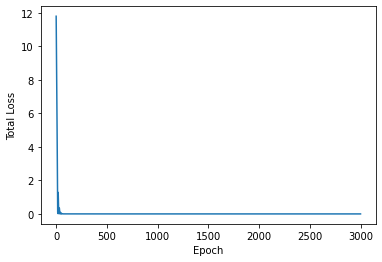

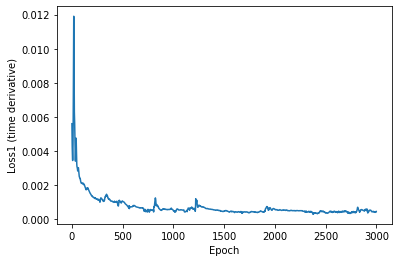

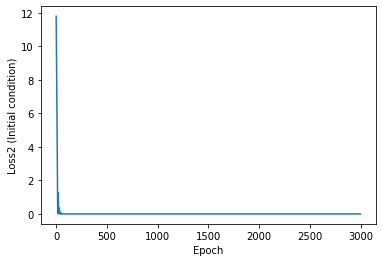

In [9]:
x_data_plot=[]
y_data_all_plot=[]
y_data_1_plot=[]
y_data_2_plot=[]

# Set fixed random number seed
torch.manual_seed(42)

start_epoch = 0
#epochs_pt = 800
epochs = 3000
ic_weight = 1
dt_weight = 10000
#pretraining = True

#if pretraining == True:
#    print('te')
#    for epoch in range(start_epoch, epochs_pt):
#        for i, data in enumerate(train_loader,0):
#            x_batch, y_batch, temp = data
#            x0 = x_batch[:,0,:]
#            optimizer.zero_grad()
#            u0 = model(x0.to(device))
#            ic_loss = criterion(u0.to(device),temp[:,0, :].to(device))
#            ic_loss.backward()
#            optimizer.step()
#        #print("Epoch ", epoch, "IC Loss ", total_loss/(i+1))
#        print("IC Loss {} Epoch {} from {}".format(ic_loss, epoch+1, epochs_pt))
#        #if not self.rank and not (epoch + 1) % writing_cycle_pt and checkpoint_path is not None:
#        #    self.write_checkpoint(checkpoint_path, epoch, True, minimum_pinn_loss, optim)
#        #if not self.rank:
#        #    print("IC Loss {} Epoch {} from {}".format(ic_loss, epoch+1, epochs_pt))


for epoch in range(epochs):
    # Print epoch
    print(f'Starting epoch {epoch}')
    
    # Set current and total loss value
    current_loss = 0.0
    total_loss = 0.0
    total_loss1 = 0.0
    total_loss2 = 0.0

    for i, data in enumerate(train_loader,0):
        #print(i)
        x_batch, y_batch, temp = data
        optimizer.zero_grad()
        print('x batch', x_batch.shape)
        print('y batch', y_batch.shape)
        print('temp', temp.shape)

        x_batch = torch.squeeze(x_batch, 0)
        y_batch = torch.squeeze(y_batch, 0)
        temp = torch.squeeze(temp, 0)

        x0 = x_batch[0,:]
        #x =  x_batch[1:,:]

        print('x_batch', x_batch.shape)
        print('y_batch', y_batch.shape)
        print('temp', temp.shape)
        
        #x.requires_grad=True
        
        x_batch.requires_grad=True
        u_pred = model(x_batch.to(device))
        print('u_pred', u_pred.shape)

        u_t = derivative(x_batch,u_pred)*normalize
        u0 = model(x0.to(device))
        #u0 = u_pred[0,:].reshape(-1, 1)
        temp = temp[0, :].reshape(-1, 1)

        print('u_t shape', u_t.shape)
        #print('y_batch shape', y_batch.shape)
        print( 'u0 shape', u0.shape)
        print('temp', temp.shape)
        #print( 'temp[0, :] shape', temp[0, 0].shape)

        #u_t= u_t.squeeze().to(device)
        #y_batch = y_batch.squeeze().to(device)

        #print('y batch after squeeze', y_batch.shape)
        #print('u_t after squeeze', u_t.shape)
        
        loss1 = criterion(u_t,y_batch)*dt_weight
        loss2 = criterion(u0.to(device),temp[0, :].reshape(-1, 1).to(device))*ic_weight

        loss = loss1+loss2

        loss.backward()
        optimizer.step()

        # Print statistics
        current_loss += loss.item()
        total_loss += loss.item()
        total_loss1 += loss1.item()
        total_loss2 += loss2.item()

        if i % 50 == 49:
            print('Loss after mini-batch %5d: %.8f' %
                  (i + 1, current_loss / 50))
            current_loss = 0.0
    #if total_loss2 < 1e-8:
    #  dt_weight = 100000
    #  ic_weight = 1
      #for g in optimizer.param_groups:
      #  g['lr'] = 1e-4
        
    print("Epoch ", epoch, "Total Loss ", total_loss/(i+1))
    print("Epoch ", epoch, "Loss 1 ", total_loss1/(i+1))
    print("Epoch ", epoch, "Loss 2", total_loss2/(i+1))

    x_data_plot.append(epoch)
    y_data_all_plot.append(total_loss/(i+1))
    y_data_1_plot.append(total_loss1/(i+1))
    y_data_2_plot.append(total_loss2/(i+1))

# Make the plot of Total Loss vs epochs
plt.plot(x_data_plot,y_data_all_plot)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.show()

# Make the plot of the supervised loss
plt.plot(x_data_plot,y_data_1_plot)
plt.xlabel('Epoch')
plt.ylabel('Loss1 (time derivative)')
plt.show()

# Make the plot of time stability loss
plt.plot(x_data_plot,y_data_2_plot)
plt.xlabel('Epoch')
plt.ylabel('Loss2 (Initial condition)')
plt.show()


In [10]:
#temp[0, :].shape

In [11]:
#u0.shape

In [12]:
#u_t.squeeze().shape

In [13]:
#y_batch.shape

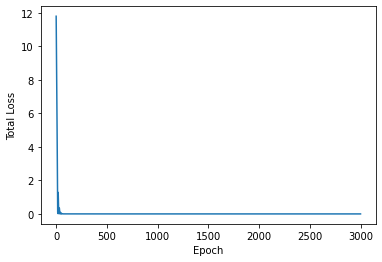

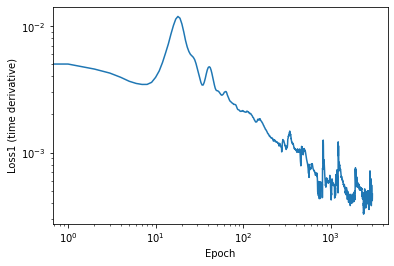

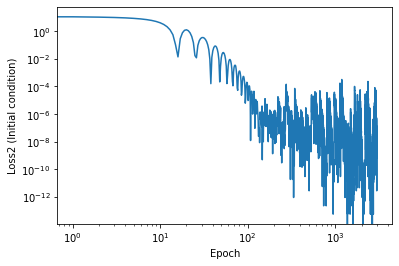

In [14]:


# Make the plot of Total Loss vs epochs
plt.plot(x_data_plot,y_data_all_plot)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.show()

# Make the plot of the supervised loss
plt.plot(x_data_plot,y_data_1_plot)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss1 (time derivative)')
plt.show()

# Make the plot of time stability loss
plt.plot(x_data_plot,y_data_2_plot)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss2 (Initial condition)')
plt.show()



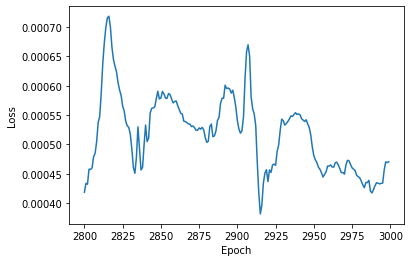

In [15]:
# Plot of last 100 epochs
plt.plot(x_data_plot[-200:],y_data_all_plot[-200:])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot of last 100 epochs
#plt.plot(x_data_plot[-200:],y_data_1_plot[-200:])
#plt.xlabel('Epoch')
#plt.ylabel('Loss 1')
#plt.show()

# Plot of last 100 epochs
#plt.plot(x_data_plot[-200:],y_data_2_plot[-200:])
#plt.xlabel('Epoch')
#plt.ylabel('Loss 2')
#plt.show()

In [16]:
#torch.save(model.state_dict(),  '/content/drive/MyDrive/NeuralSolvers-heat-eqn/examples/Research project/pinnmodel_' + str(normalize) + str(batch_size)+'.pt')

In [17]:
# Make a prediction
#normalize = 1
print(ds.x.shape)
pred = model(ds.x.float().to(device)) #GPU
pred = pred.detach().cpu().numpy()/normalize

# ground-truth
df_y_tensor_np = ds.temp.numpy()/normalize

print(pred)
print(df_y_tensor_np.shape)

torch.Size([2299, 5])
[[-3.4696872]
 [-3.4882145]
 [-3.4783907]
 ...
 [-1.2444769]
 [-1.2712271]
 [-1.270085 ]]
(2299, 1)


In [18]:
# Some statistics on the model performance on all of dataset
mae = np.sum(np.abs(pred- df_y_tensor_np).mean(axis=None))
print('MAE:', mae)

mse = ((df_y_tensor_np - pred)**2).mean(axis=None)
print('MSE:', mse)

rel_error = np.linalg.norm(pred - df_y_tensor_np) / np.linalg.norm(df_y_tensor_np)
print('Relative error (%):', rel_error*100)


MAE: 1.7218541
MSE: 3.299938
Relative error (%): 54.56151366233826


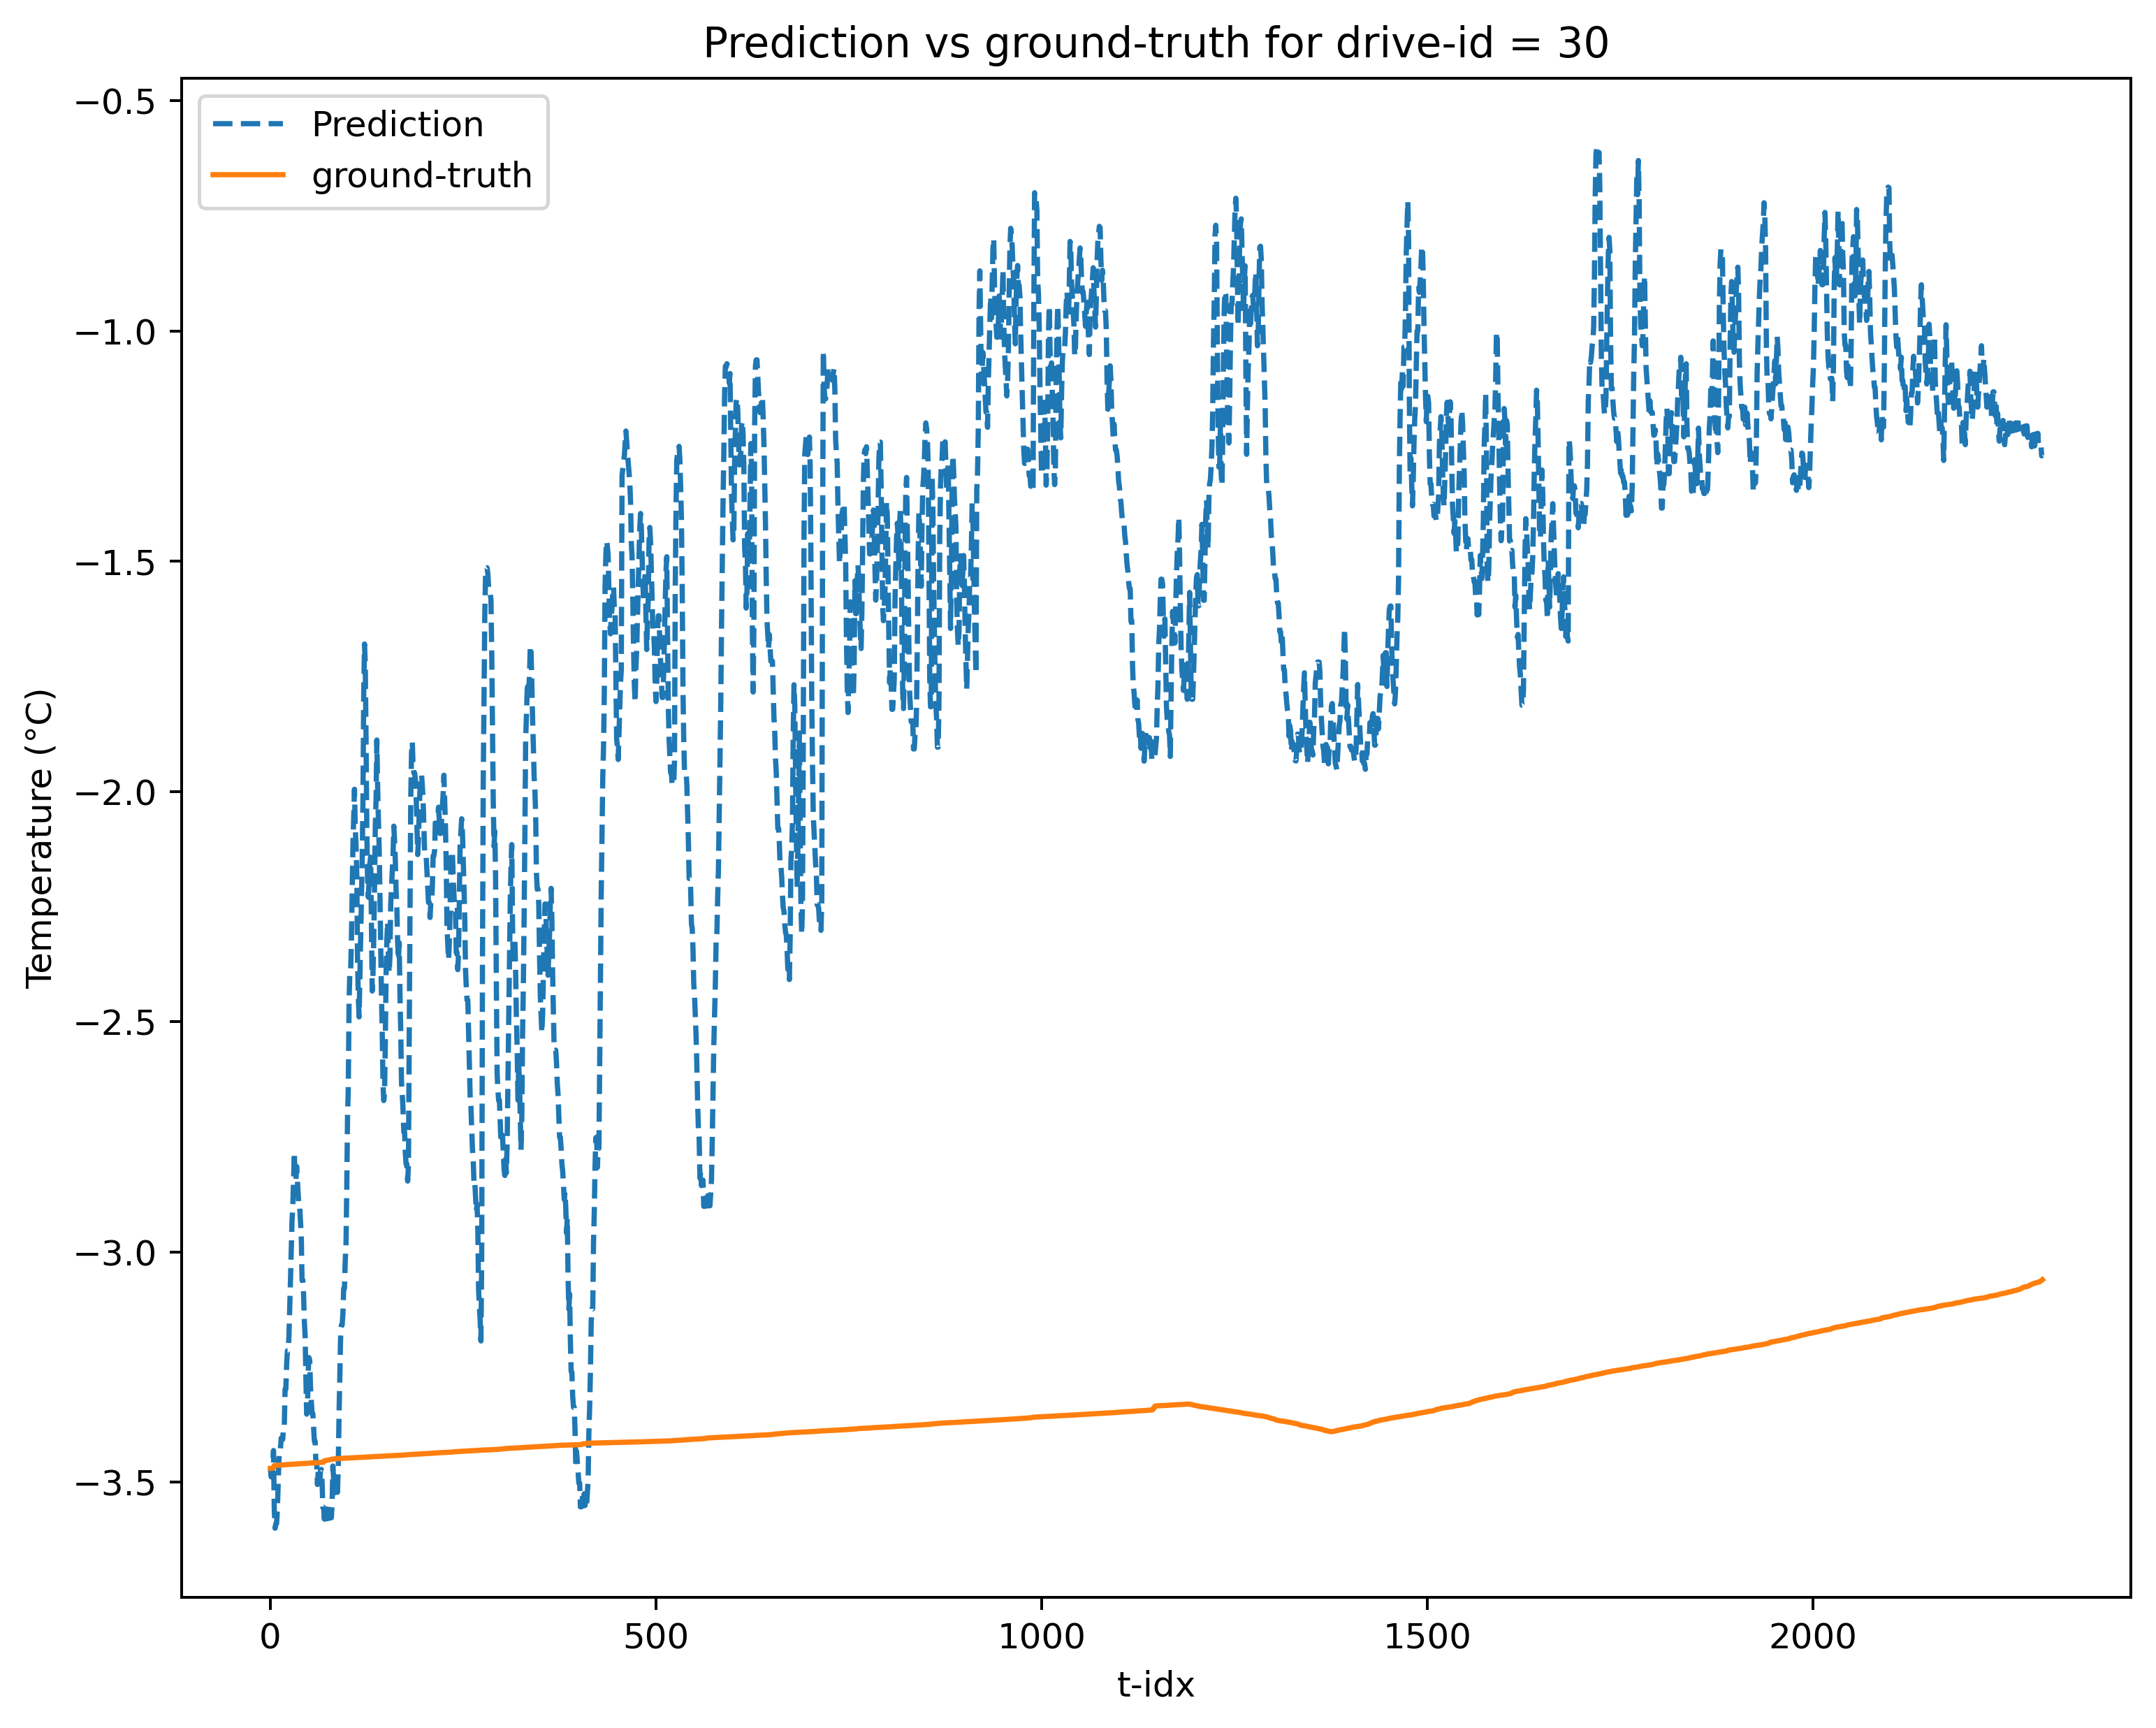

In [19]:
figure(figsize=(10, 8), dpi= 360)

plt.plot(pred, '--')
plt.plot(df_y_tensor_np, '-')
plt.title('Prediction vs ground-truth for drive-id = {}'.format(id))
plt.legend(['Prediction', 'ground-truth'])
plt.xlabel('t-idx')
plt.ylabel('Temperature (°C)')
plt.show()



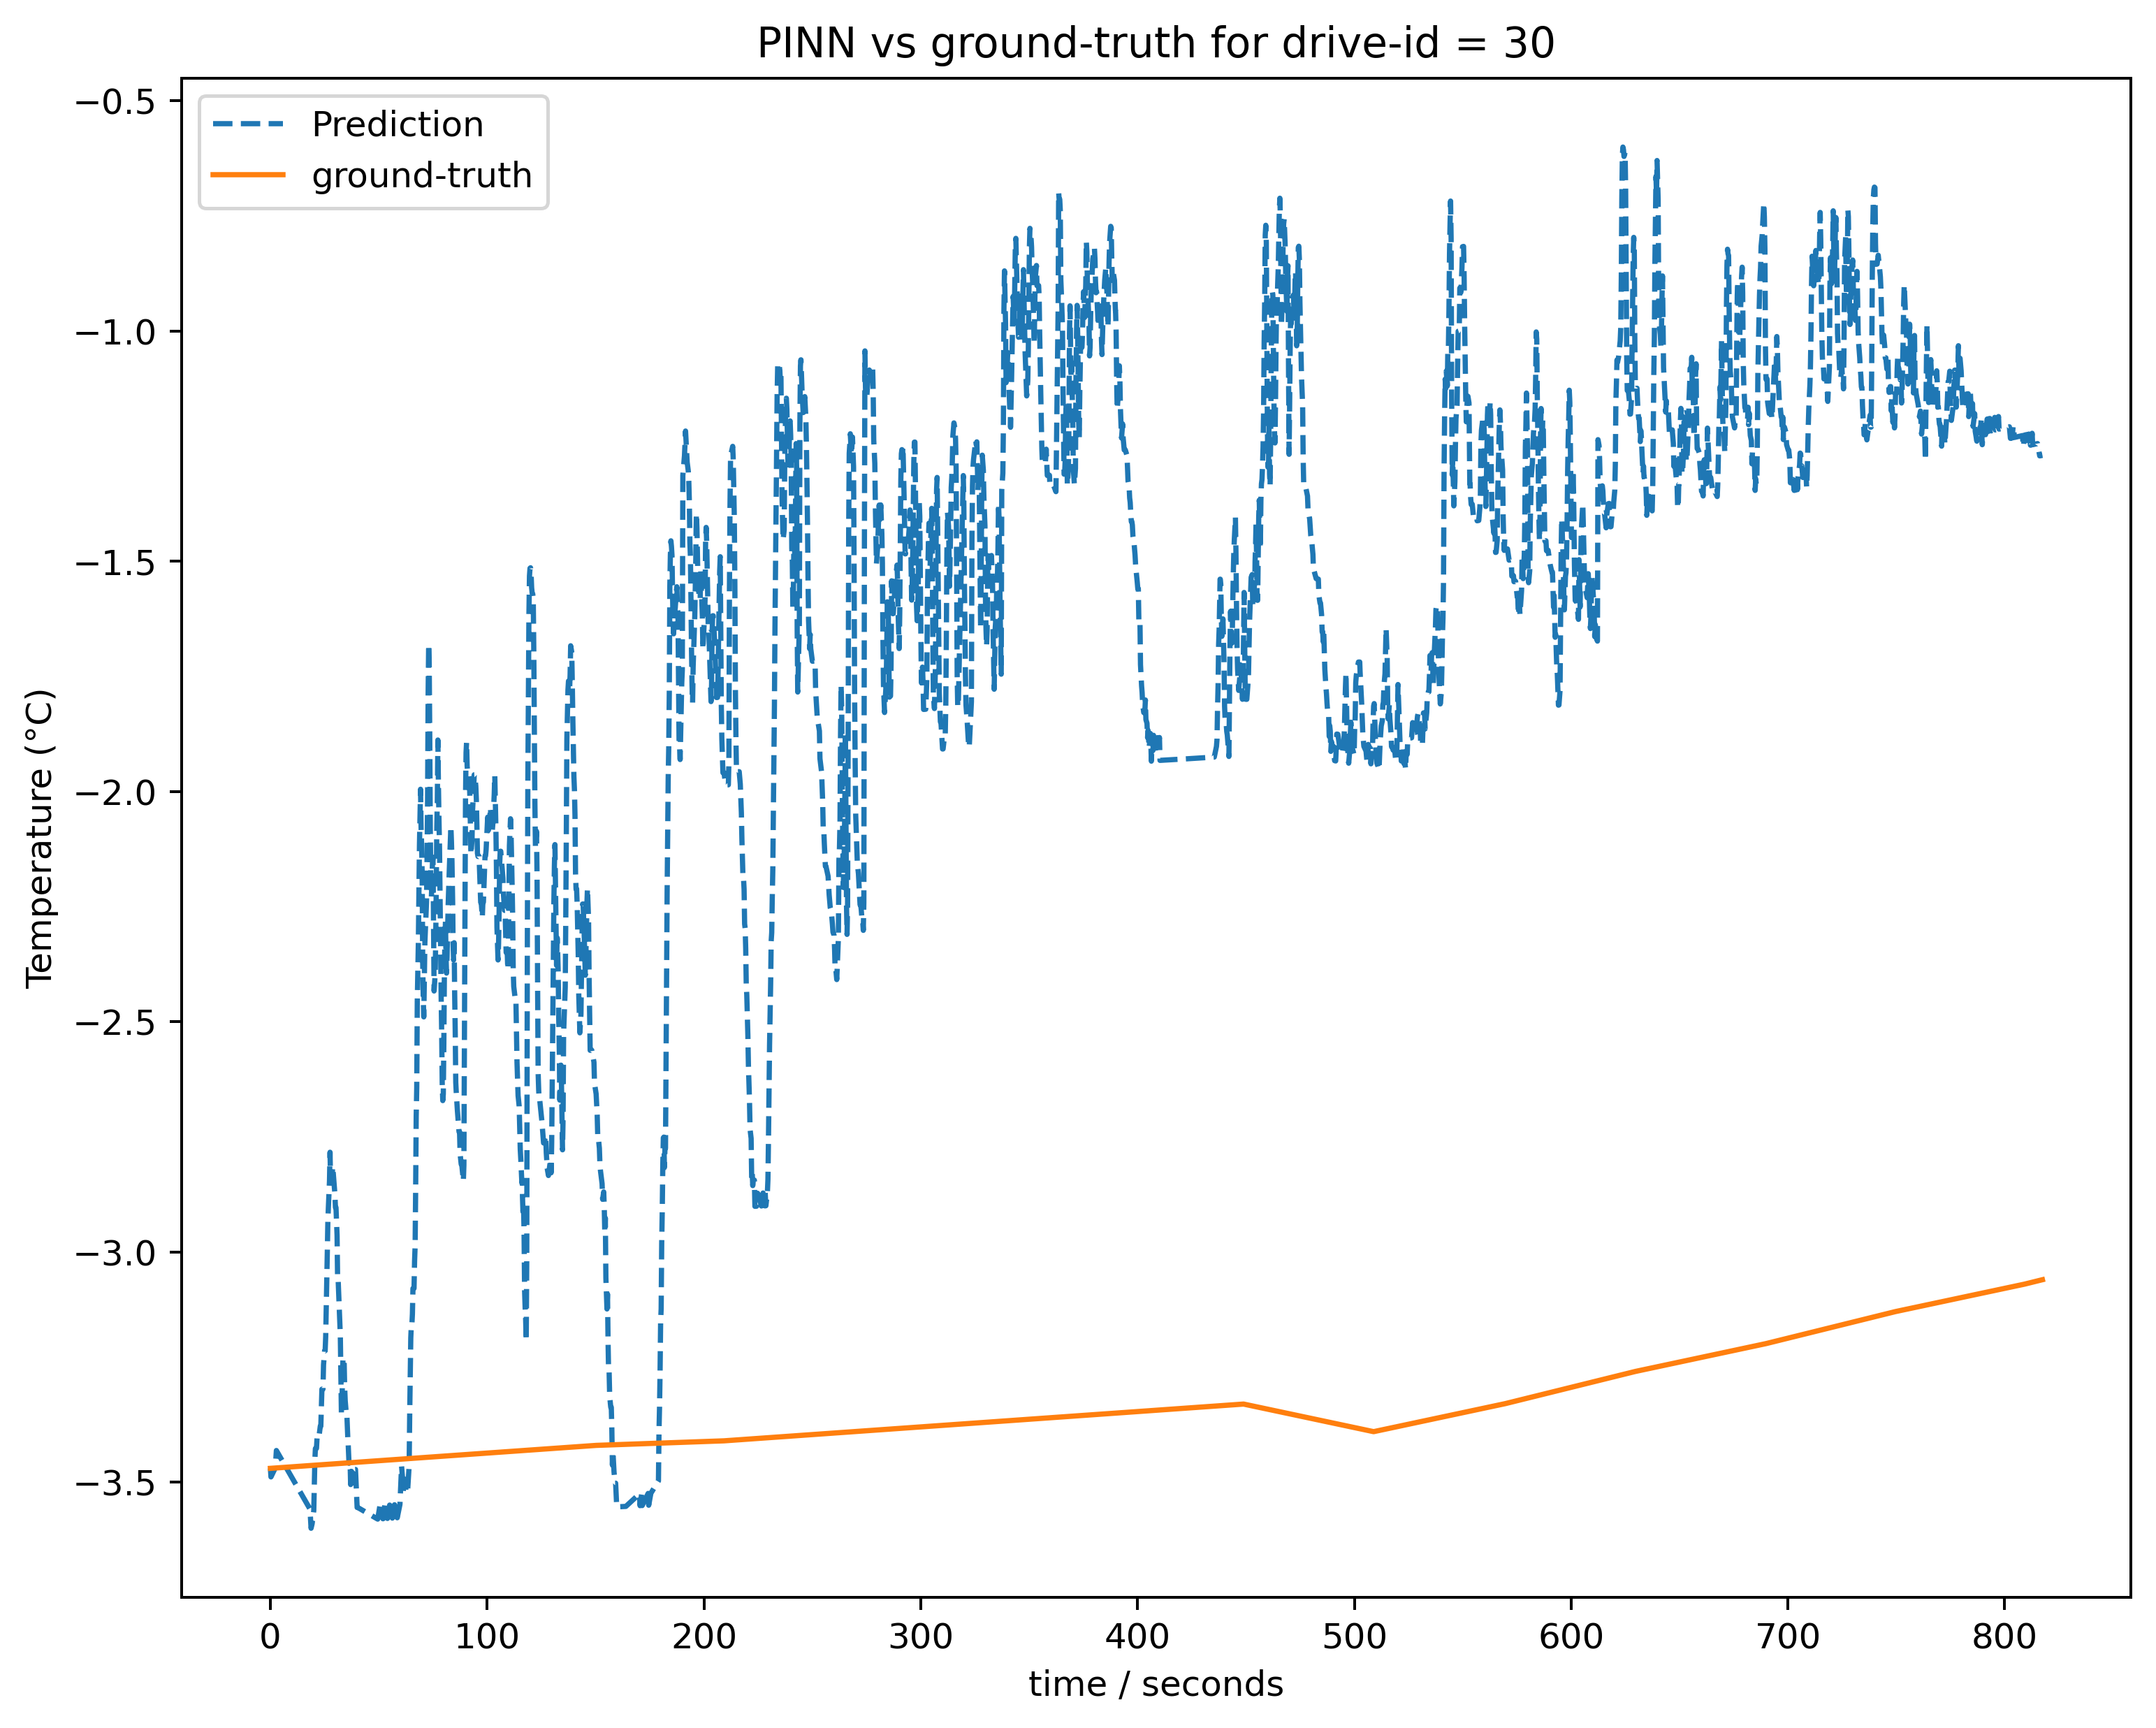

In [20]:
figure(figsize=(10, 8), dpi= 360)

#time
t=ds.t

plt.plot(t,pred, '--')
plt.plot(t,df_y_tensor_np, '-')
plt.title('PINN vs ground-truth for drive-id = {}'.format(id))
plt.legend(['Prediction', 'ground-truth'])
plt.xlabel('time / seconds')
plt.ylabel('Temperature (°C)')
plt.show()

In [21]:
print(u_t.shape)
print(y_batch.shape)

torch.Size([2299, 1])
torch.Size([2299, 1])


ds.x torch.Size([2299, 5])
pred torch.Size([2299, 1])
grad u tensor([[ 2.8156e-02,  2.5016e-02, -4.9573e-01,  3.7633e-02,  3.9312e-04],
        [ 2.8050e-02,  2.5128e-02, -4.9444e-01,  3.7724e-02,  3.9306e-04],
        [ 2.8050e-02,  2.5128e-02, -4.9444e-01,  3.7724e-02,  3.9306e-04],
        ...,
        [ 2.4986e-02,  1.0972e-02, -2.6528e-01,  2.9723e-02,  1.0989e-03],
        [ 2.4037e-02,  1.5350e-02, -4.0367e-01,  3.1282e-02,  9.1441e-04],
        [ 2.4037e-02,  1.5350e-02, -4.0367e-01,  3.1282e-02,  9.1441e-04]],
       grad_fn=<CopyBackwards>)
u_t torch.Size([2299, 1])
u_t tensor([[0.0004],
        [0.0004],
        [0.0004],
        ...,
        [0.0011],
        [0.0009],
        [0.0009]], grad_fn=<ViewBackward>)
torch.Size([2299, 1])
MAE: 0.000105128805
MSE: 4.5626326e-08
Relative error (%): 27.694952487945557


<Figure size 3600x2880 with 0 Axes>

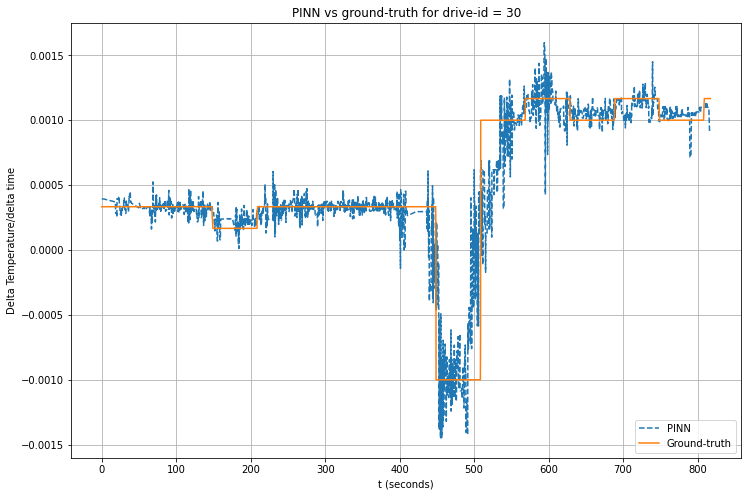

In [22]:
normalize=1
ds.x.requires_grad=True
pred = model(ds.x.float().to(device))/normalize
#pred = pred.detach().cpu().numpy()/normalize

print('ds.x', ds.x.shape)
print('pred', pred.shape)
# ground-truth
df_y_tensor_np = ds.temp.numpy()/normalize

u_t = derivative(ds.x,pred)
#u_t=u_t[:,4]
print('u_t', u_t)
figure(figsize=(10, 8), dpi= 360)

t = ds.t.numpy()

#u_t = u_t.reshape(-1,1)
#y_batch = y_batch.reshape(-1,1)

print(u_t.shape)
mae = np.sum(np.abs(u_t.detach().numpy() - ds.y.detach().numpy() ).mean(axis=None))
print('MAE:', mae)

mse = ((u_t.detach().numpy() - ds.y.detach().numpy())**2).mean(axis=None)
print('MSE:', mse)

rel_error = np.linalg.norm(u_t.detach().numpy() - ds.y.detach().numpy()) / np.linalg.norm(ds.y.detach().numpy())
print('Relative error (%):', rel_error*100)

plt.figure(figsize = (12, 8))
plt.plot(t, u_t.detach().numpy(), '--', label='PINN')
plt.plot(t, ds.y, '-', label='Ground-truth')
plt.title('PINN vs ground-truth for drive-id = {}'.format(id))
plt.xlabel('t (seconds)')
plt.ylabel('Delta Temperature/delta time')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [23]:
# Import a slice of the datase (based on drive-id) for further analysis
#id = 0
dss = TeslaDatasetpinn(device = device, ID = id)


(2301, 10)


(2299, 1)
(2299, 1)
MAE: 1.7218541
MSE: 3.299938
Relative error (%): 54.56151366233826


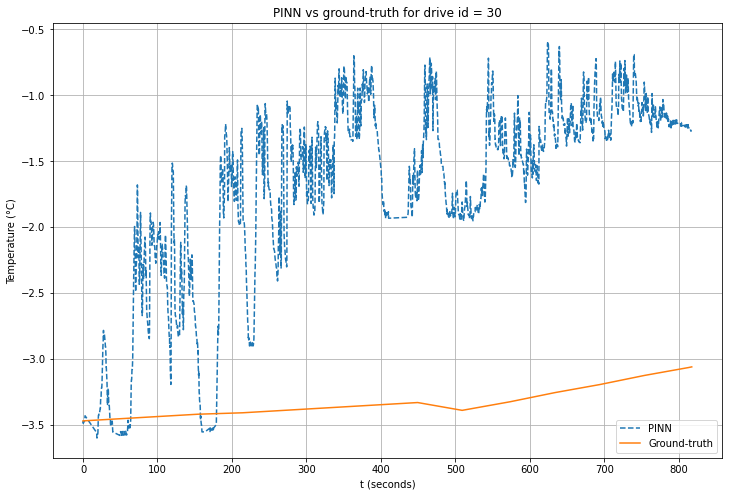

In [24]:
# Plot of predicted temperature against ground-truth temperature
t = dss.t.numpy()

true_temp = dss.temp.numpy()

pred_temp = model(dss.x.to(device))
pred_temp = pred_temp.detach().cpu().numpy()

print((pred_temp.shape))
print((true_temp.shape))

#MAE
mae = np.sum(np.abs(pred_temp- true_temp).mean(axis=None))
print('MAE:', mae)

#MSE
mse = ((true_temp - pred_temp)**2).mean(axis=None)
print('MSE:', mse)

#Relative error
rel_error = np.linalg.norm(pred_temp - true_temp) / np.linalg.norm(true_temp)
print('Relative error (%):', rel_error*100)


plt.figure(figsize = (12, 8))
plt.plot(t, pred_temp, '--', label='PINN')
plt.plot(t, true_temp, '-', label='Ground-truth')
plt.title('PINN vs ground-truth for drive id = {}'.format(id))
plt.xlabel('t (seconds)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [25]:

#model.load_state_dict(torch.load( '/content/drive/MyDrive/NeuralSolvers-heat-eqn/examples/Research project/modelfor_' + str(normalize) + str(batch_size)+'.pt'))